In [2]:
%load_ext autoreload

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import AFAI_library as afai
import AFAI_library_torch as afai_cuda
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
# from mpl_toolkits.mplot3d import Axes3D

In [4]:
%autoreload 2

In [11]:
try:
    import torch
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
except ImportError:
    print("PyTorch is not installed.")

PyTorch version: 2.0.0.dev20230207+cu118
CUDA available: True
Number of GPUs: 1


Square lattices:
without disorder only:
    bulk properties:periodic boundary condition in ky + periodic boundary condition in kx:
        kx and ky are both good quantum number --> energy spectrum in a 3D plot
    edge properties:open boundary condition in ky + periodic boundary condition in kx:
        kx is a good quantum number --> energy spectrum in a 2D plot

with/without disorder:
    bulk properties:twisted boundary condition in kx and ky:
        both theta_x and theta_y are good quantum numbers
    edge properties: twisted boundary condition in kx and open boundary condition in ky:
        theta_x is a good quantum number

1. Open Boundary Condition

In [12]:
period = 2
hopping = - np.pi/(2* period)
model_test = afai.tb_floquet_pbc(period, 1, hopping, 1,2)
np.set_printoptions(linewidth=300)

In [13]:
H1 = model_test.Hamiltonian_pbc_obc1(0)
print(H1)

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [14]:
H2 = model_test.Hamiltonian_pbc_obc2(1)
print(H2)

[[0.        +0.j         0.42435244-0.66088977j]
 [0.42435244+0.66088977j 0.        +0.j        ]]


In [15]:
H3 = model_test.Hamiltonian_pbc_obc3(0)
print(H3)

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [16]:
H4 = model_test.Hamiltonian_pbc_obc4(1)
print(H4)

[[0.        +0.j 0.78539816+0.j]
 [0.78539816+0.j 0.        +0.j]]


In [17]:
H5 = model_test.Hamiltonian_pbc_obc_onsite()
print(H5)

[[ 0.78539816+0.j  0.        +0.j]
 [ 0.        +0.j -0.78539816+0.j]]


In [18]:
period = 100
hopping = - np.pi/(2* period)
a = 1
model_test1 = afai.tb_floquet_pbc(period, a, hopping, 30,2)
savepath = "rudnercleanobc1.pdf"

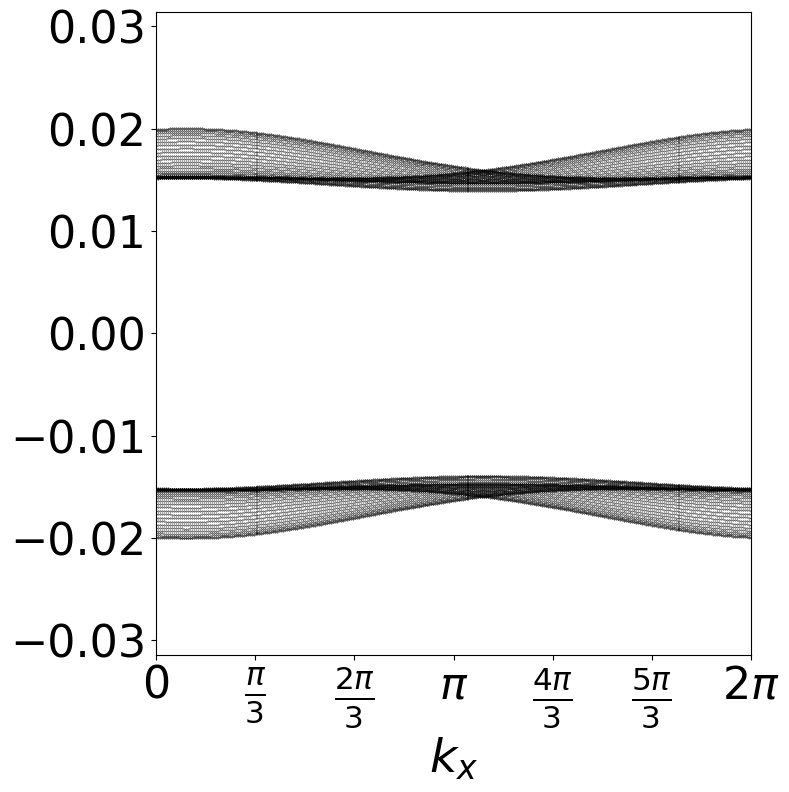

In [19]:
u = model_test1.quasienergy_eigenstates(300, 15, reverse = True, plot = True, save_path=savepath)

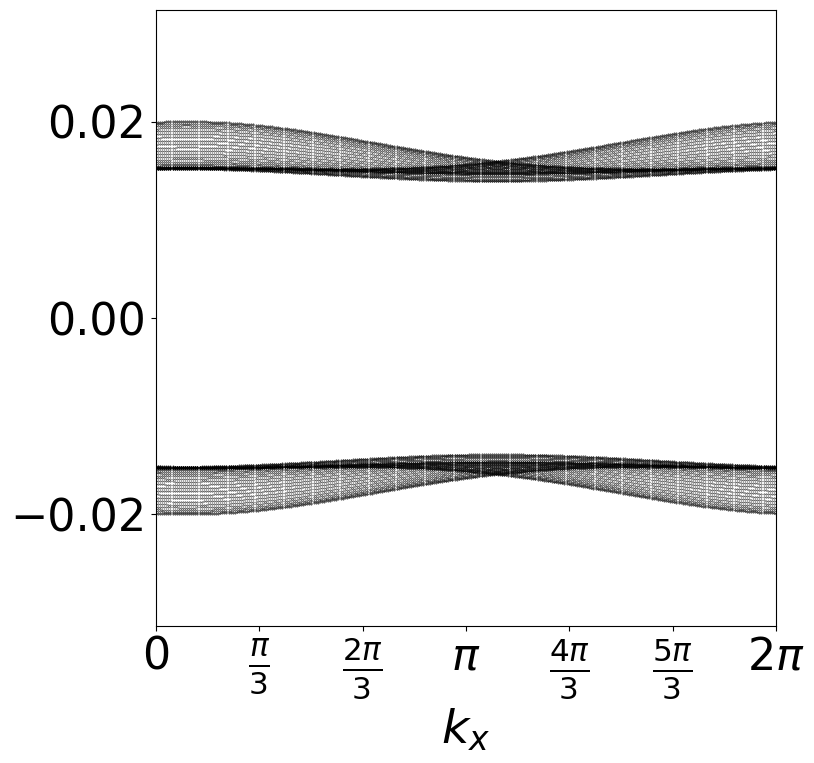

In [20]:
u = model_test1.quasienergy_eigenstates(300, 30, reverse = False, plot = True)

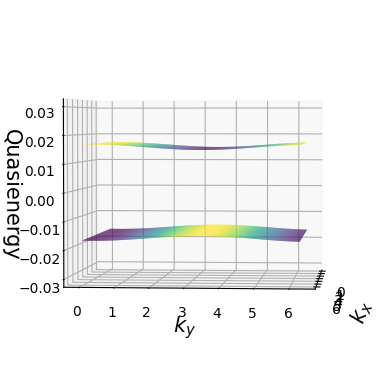

In [21]:
period = 100
hopping = - np.pi/(2* period)
model_test1b = afai.tb_floquet_pbc(period, a, hopping, 1,2)
u = model_test1b.quasienergy_eigenstates(300, 15, reverse = False, plot = True, pbc='xy')

In [22]:
period = 100
hopping = 3*np.pi/(2* period)
model_test2 = afai.tb_floquet_pbc(period, a, hopping, 30, 2)
np.set_printoptions(linewidth=210)
savepath = "rudnercleanobc2.pdf"

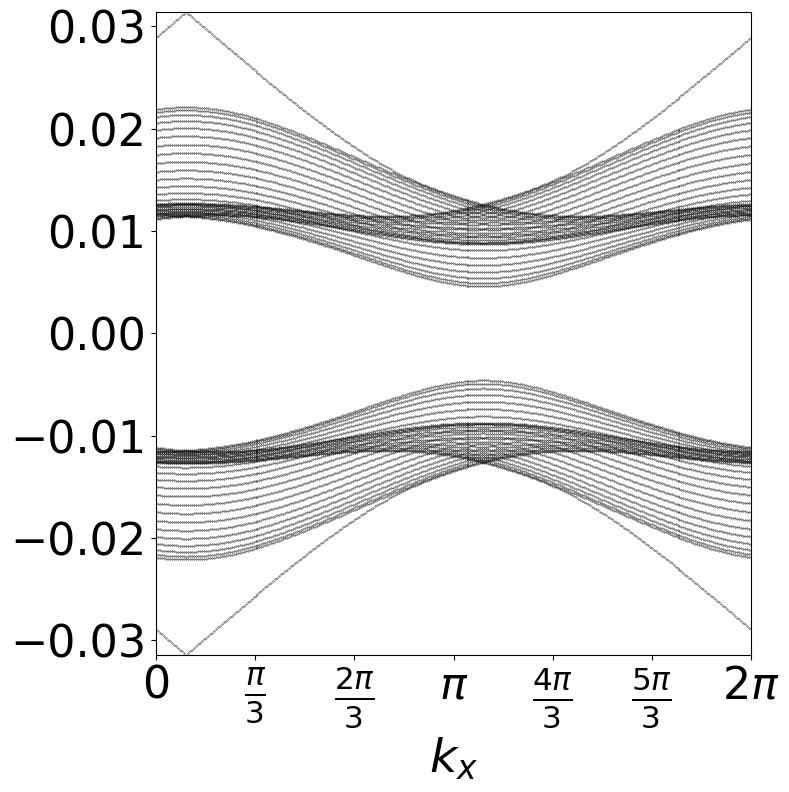

In [23]:
u = model_test2.quasienergy_eigenstates(300, 15, reverse = True, plot = True, save_path=savepath)

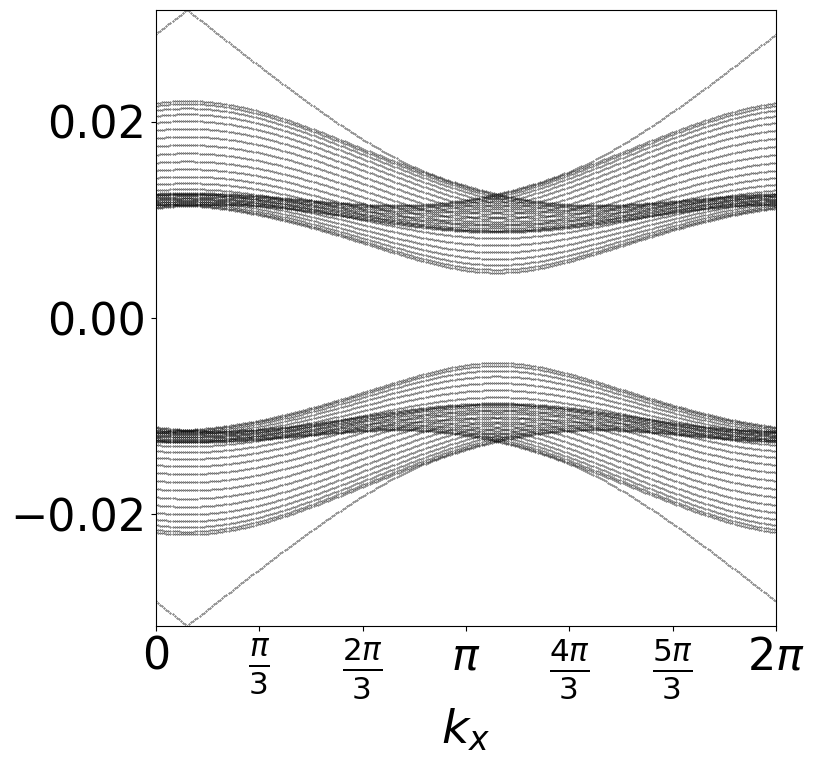

In [24]:
u = model_test2.quasienergy_eigenstates(300, 15, reverse = False, plot = True)

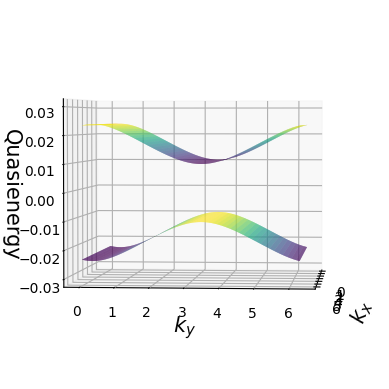

In [25]:
period = 100
hopping = 3*np.pi/(2* period)
model_test2b = afai.tb_floquet_pbc(period, a, hopping, 1,2)
u = model_test2b.quasienergy_eigenstates(300, 15, reverse = False, plot = True, pbc='xy')

In [26]:
period = 100
hopping = -5*np.pi/(2* period)
model_test3 = afai.tb_floquet_pbc(period, a, hopping, 30, 2)
np.set_printoptions(linewidth=210)
savepath = "rudnercleanobc3.pdf"
savepath1 = "rudnercleanobc3_1.pdf"

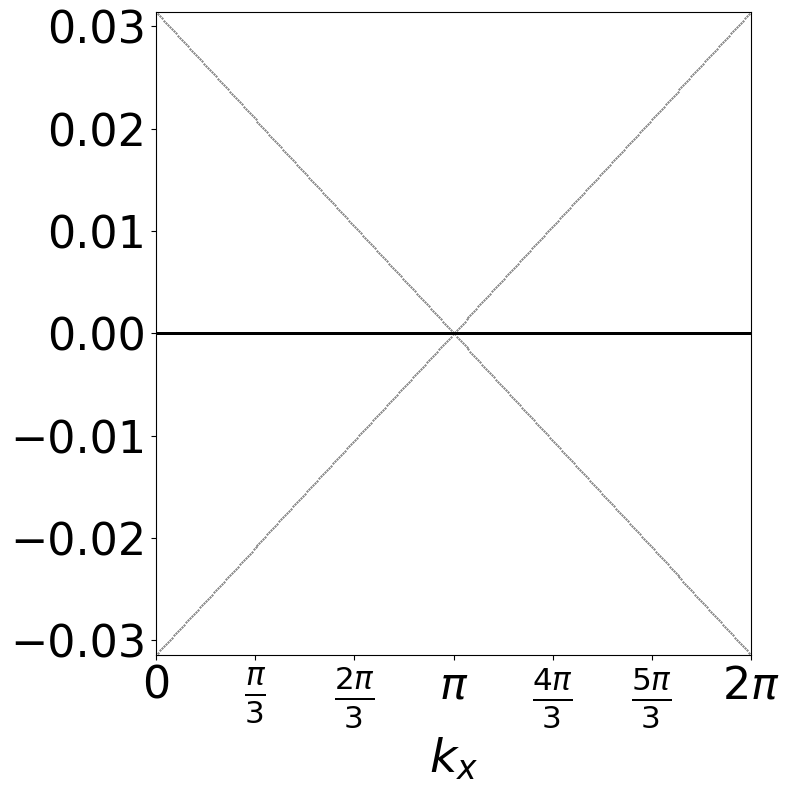

In [27]:
u = model_test3.quasienergy_eigenstates(300, 15, delta=0,reverse = True, plot = True, save_path=savepath)

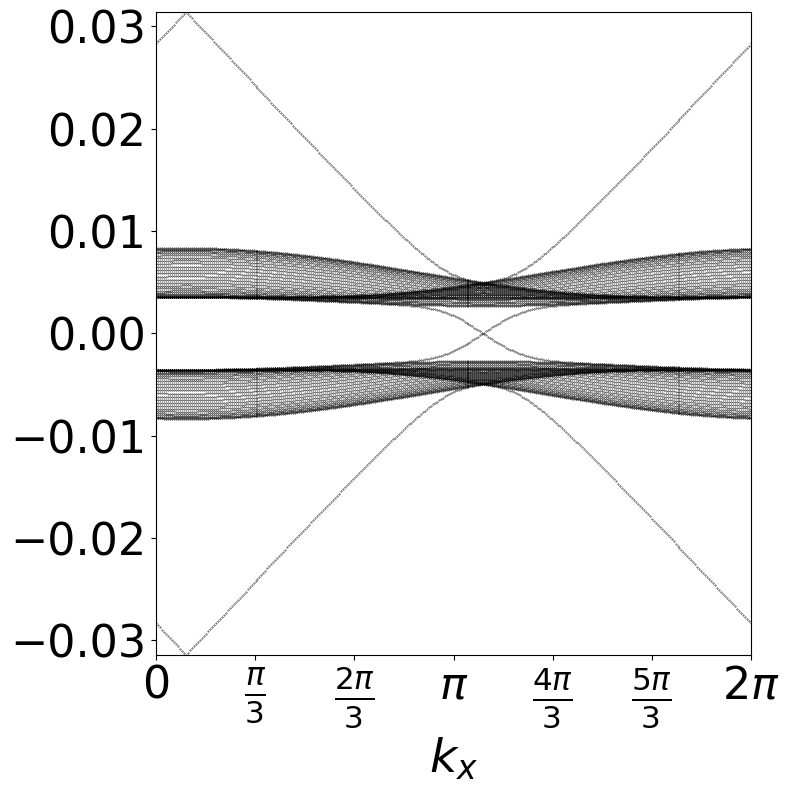

In [28]:
u = model_test3.quasienergy_eigenstates(300, 15, reverse = True, plot = True, save_path=savepath1)

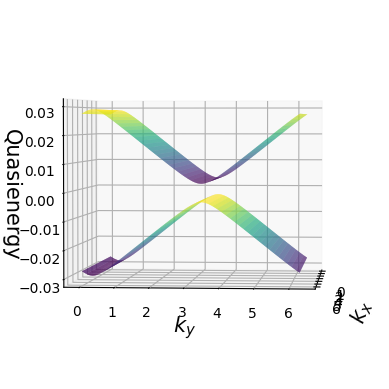

In [29]:
period = 100
hopping = -5*np.pi/(2* period)
model_test3b = afai.tb_floquet_pbc(period, a, hopping, 1,2)
u = model_test3b.quasienergy_eigenstates(300, 15, reverse = False, plot = True, pbc='xy')

2. Twisted Boundary Condition (Adding disorder... either aperiodic or fully disordered)

In [30]:
a = 1 ## Lattice constant
period = 100
hopping = - np.pi/(2* period)
n = 20 # number of sites along y

In [31]:
model_test_tbc0 = afai.tb_floquet_tbc(period, a, hopping, n)
model_test_tbc0_cuda = afai_cuda.tb_floquet_tbc_cuda(period, a, hopping, n)

In [32]:
theta_y = 0.5
tbc = 'x'
original_H3 = model_test_tbc0.Hamiltonian_tbc3(theta_y, tbc)
optimized_H3 = model_test_tbc0_cuda.Hamiltonian_tbc3(theta_y, tbc)

In [33]:
np.set_printoptions(linewidth=300)
print(torch.tensor(original_H3, dtype=torch.cfloat))
print(optimized_H3.cpu())

tensor([[0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        ...,
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0157+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0157+0.j, 0.0000+0.j, 0.0000+0.j]])
tensor([[0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        ...,
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0157-0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j,  ..., 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
     

In [34]:
if torch.allclose(torch.tensor(original_H3, dtype=torch.cfloat), optimized_H3.cpu()):
    print("The two implementations are equivalent.")
else:
    print("The two implementations are not equivalent.")

RuntimeError: ComplexFloat did not match ComplexDouble

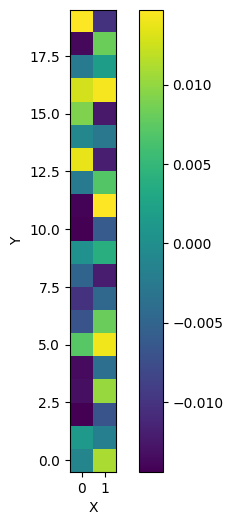

In [ ]:
disorder = model_test_tbc0.Hamiltonian_disorder(0.015,True)

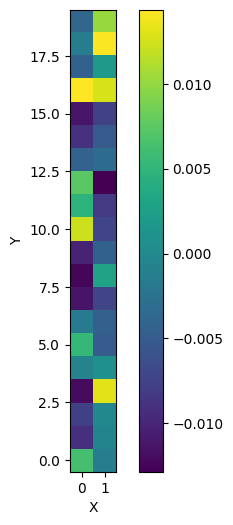

In [ ]:
disorder = model_test_tbc0_cuda.Hamiltonian_disorder(0.015,True)

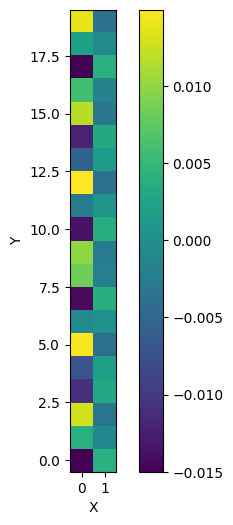

In [ ]:
aperiodic = model_test_tbc0.aperiodic_Honsite(0.015,contourplot=True)

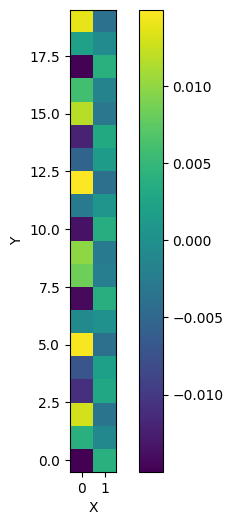

In [ ]:
aperiodic_cuda = model_test_tbc0_cuda.aperiodic_Honsite(0.015,contourplot=True)

In [ ]:
if torch.allclose(torch.tensor(aperiodic, dtype=torch.cfloat), aperiodic_cuda.cpu()):
    print("The two implementations are equivalent.")
else:
    print("The two implementations are not equivalent.")
    print(aperiodic)
    print(aperiodic_cuda)

The two implementations are not equivalent.
[[-0.015     +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.00399383-0.j  0.        +0.j ...  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.00399383-0.j ...  0.        +0.j  0.        +0.j  0.        +0.j]
 ...
 [ 0.        +0.j  0.        +0.j  0.        +0.j ... -0.00055225+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j  0.0137674 -0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j  0.        +0.j -0.00366564+0.j]]
tensor([[-0.0150+0.j,  0.0000+0.j,  0.0000+0.j,  ...,  0.0000+0.j,  0.0000+0.j,
          0.0000+0.j],
        [ 0.0000+0.j,  0.0040+0.j,  0.0000+0.j,  ...,  0.0000+0.j,  0.0000+0.j,
          0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j,  0.0040+0.j,  ...,  0.0000+0.j,  0.0000+0.j,
          0.0000+0.j],
        ...,
        [ 

In [ ]:
vd0 = np.pi/(300000 * period)

In [ ]:
H_onsite = model_test_tbc0.Hamiltonian_onsite(vd0, delta=0.1, fully_disorder=False)

In [ ]:
H_onsite_cuda = model_test_tbc0_cuda.Hamiltonian_onsite(vd0, delta=0.1, fully_disorder=False)

In [ ]:
if torch.allclose(torch.tensor(H_onsite, dtype=torch.cfloat), H_onsite_cuda.cpu()):
    print("The two implementations are equivalent.")
else:
    print("The two implementations are not equivalent.")
    print(H_onsite)
    print(H_onsite_cuda)

The two implementations are equivalent.


In [ ]:
U_ori = model_test_tbc0.time_evolution_operator(period, tbc="x", vd=vd0, rotation_angle=np.pi/4, n=20, theta_x=np.pi/4, fully_disorder=False)
print(U_ori)

[[-9.38926272e-02-0.9049622j  -1.19638297e-01-0.26198668j -2.83479018e-01-0.03424453j ...  0.00000000e+00+0.j          0.00000000e+00+0.j          0.00000000e+00+0.j        ]
 [ 7.72334531e-02-0.23660924j -1.09616709e-01+0.9061984j  -1.16386337e-01-0.12328757j ...  0.00000000e+00+0.j          0.00000000e+00+0.j          0.00000000e+00+0.j        ]
 [ 2.71772735e-01-0.02781839j -8.67679064e-02-0.01468086j -1.01277623e-01+0.86375879j ...  0.00000000e+00+0.j          0.00000000e+00+0.j          0.00000000e+00+0.j        ]
 ...
 [ 0.00000000e+00+0.j          0.00000000e+00+0.j          0.00000000e+00+0.j         ... -1.01280326e-01+0.86375862j -1.12154806e-01-0.12377966j  4.18537500e-07-0.27585159j]
 [ 0.00000000e+00+0.j          0.00000000e+00+0.j          0.00000000e+00+0.j         ... -8.25115465e-02-0.01485621j -9.38934070e-02+0.90496215j -1.00655379e-01-0.26984954j]
 [ 0.00000000e+00+0.j          0.00000000e+00+0.j          0.00000000e+00+0.j         ...  2.76817694e-03-0.26278809j  1

In [ ]:
U_opt = model_test_tbc0_cuda.time_evolution_operator(period, tbc="x", vd=vd0, rotation_angle= torch.tensor(np.pi/4), theta_x= torch.tensor(np.pi/4), fully_disorder=False)
print(U_opt)

tensor([[-9.3890e-02-0.9050j, -1.1964e-01-0.2620j, -2.8348e-01-0.0342j,
          ...,  0.0000e+00+0.0000j,  0.0000e+00+0.0000j,
          0.0000e+00+0.0000j],
        [ 7.7233e-02-0.2366j, -1.0961e-01+0.9062j, -1.1639e-01-0.1233j,
          ...,  0.0000e+00+0.0000j,  0.0000e+00+0.0000j,
          0.0000e+00+0.0000j],
        [ 2.7177e-01-0.0278j, -8.6768e-02-0.0147j, -1.0128e-01+0.8638j,
          ...,  0.0000e+00+0.0000j,  0.0000e+00+0.0000j,
          0.0000e+00+0.0000j],
        ...,
        [ 0.0000e+00+0.0000j,  0.0000e+00+0.0000j,  0.0000e+00+0.0000j,
          ..., -1.0128e-01+0.8638j, -1.1216e-01-0.1238j,
         -2.4597e-07-0.2759j],
        [ 0.0000e+00+0.0000j,  0.0000e+00+0.0000j,  0.0000e+00+0.0000j,
          ..., -8.2512e-02-0.0149j, -9.3891e-02+0.9050j,
         -1.0066e-01-0.2698j],
        [ 0.0000e+00+0.0000j,  0.0000e+00+0.0000j,  0.0000e+00+0.0000j,
          ...,  2.7688e-03-0.2628j,  1.1270e-01-0.2219j,
         -1.0961e-01-0.9062j]], device='cuda:0')


c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  H3 = torch.zeros((self.nx * self.ny, self.nx * self.ny), dtype=torch.cfloat, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = x_indices * torch.cos(rotation_angle) - y_indices * torch.sin(rotation_angle)


In [ ]:
if torch.allclose(torch.tensor(U_ori, dtype=torch.cfloat), U_opt.cpu()):
    print("The two implementations are equivalent.")
else:
    print("The two implementations are not equivalent.")
    print(U_ori)
    print(U_opt)

The two implementations are equivalent.


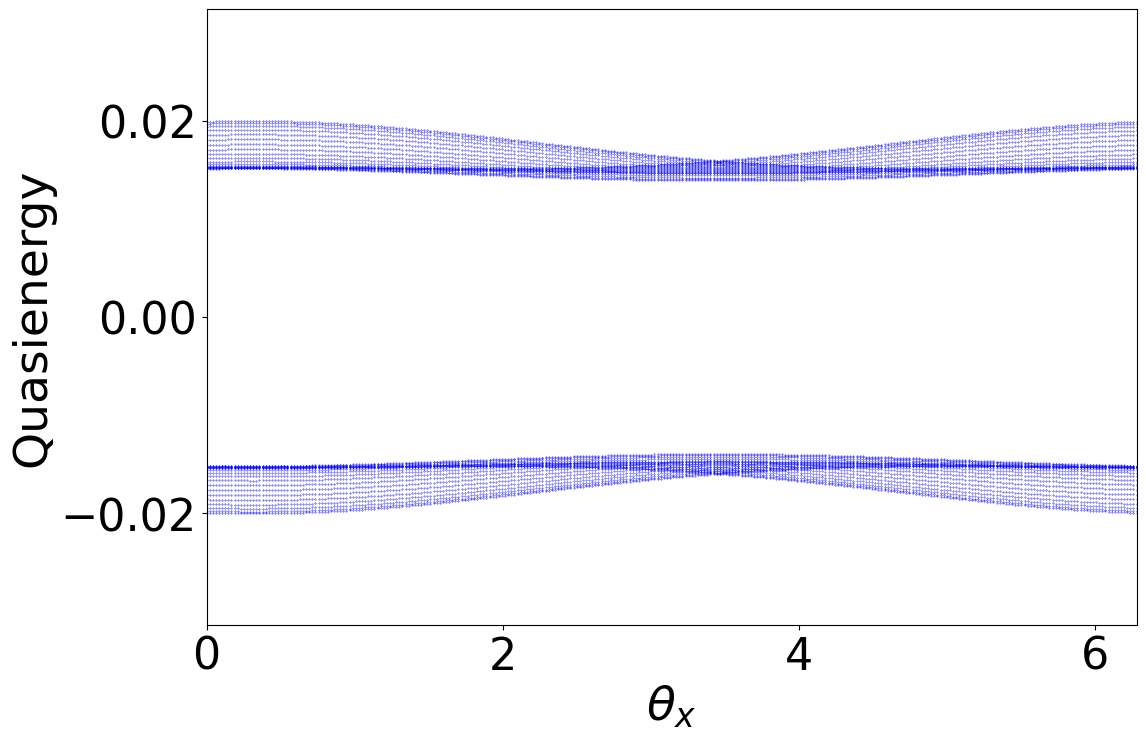

In [ ]:
eigvals, eigvecs = model_test_tbc0.quasienergies_states_edge(vd0, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=True)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  H3 = torch.zeros((self.nx * self.ny, self.nx * self.ny), dtype=torch.cfloat, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = x_indices * torch.cos(rotation_angle) - y_indices * torch.sin(rotation_angle)


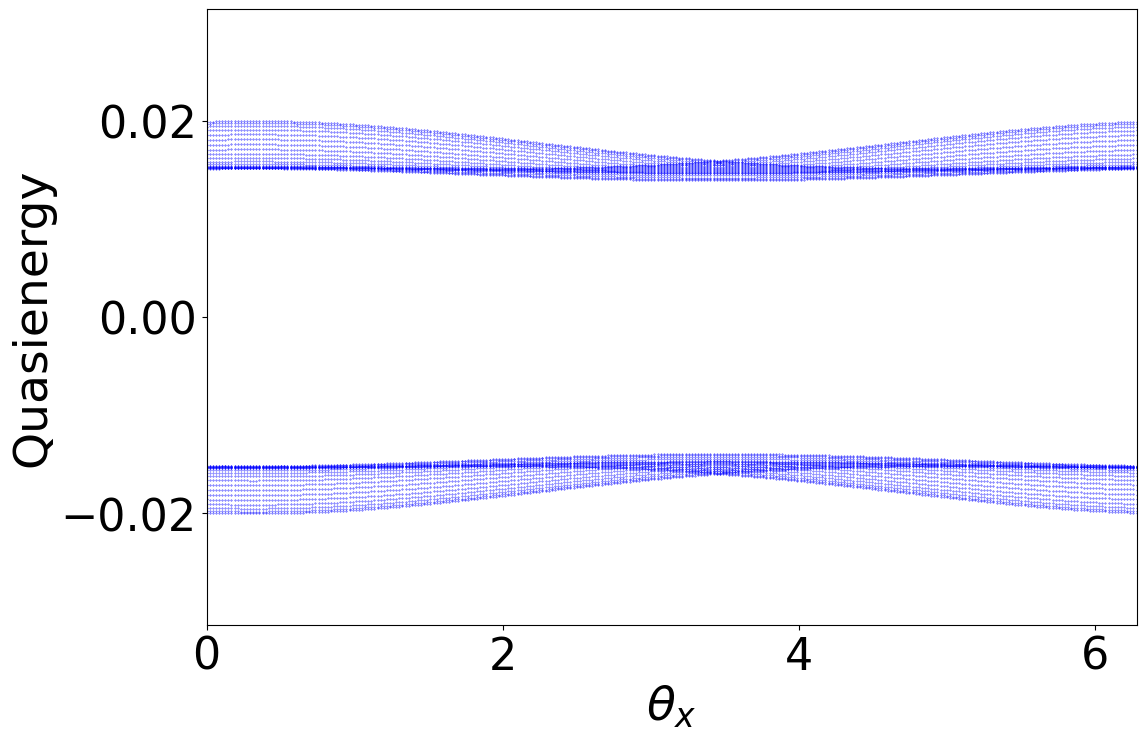

In [ ]:
eigvals_cuda, eigvecs_cuda = model_test_tbc0_cuda.quasienergies_states_edge(vd0, torch.tensor(np.pi/4), theta_x_num= 300, plot = True, fully_disorder=True)

In [ ]:
if torch.allclose(torch.tensor(eigvals, dtype=torch.float), eigvals_cuda.cpu()):
    print("The two implementations are equivalent.")
else:
    print("The two implementations are not equivalent.")
print(eigvals)
print(eigvals_cuda)

The two implementations are equivalent.
[[-0.01993965 -0.01974874 -0.01944568 ...  0.01944566  0.01974874  0.01993963]
 [-0.01994934 -0.01975822 -0.01945484 ...  0.01945482  0.01975822  0.01994932]
 [-0.01995837 -0.01976706 -0.01946338 ...  0.01946336  0.01976706  0.01995835]
 ...
 [-0.01991833 -0.01972787 -0.01942552 ...  0.01942549  0.01972787  0.01991831]
 [-0.01992931 -0.01973862 -0.0194359  ...  0.01943588  0.01973862  0.01992929]
 [-0.01993965 -0.01974874 -0.01944568 ...  0.01944566  0.01974874  0.01993963]]
tensor([[-0.0199, -0.0197, -0.0194,  ...,  0.0194,  0.0197,  0.0199],
        [-0.0199, -0.0198, -0.0195,  ...,  0.0195,  0.0198,  0.0199],
        [-0.0200, -0.0198, -0.0195,  ...,  0.0195,  0.0198,  0.0200],
        ...,
        [-0.0199, -0.0197, -0.0194,  ...,  0.0194,  0.0197,  0.0199],
        [-0.0199, -0.0197, -0.0194,  ...,  0.0194,  0.0197,  0.0199],
        [-0.0199, -0.0197, -0.0194,  ...,  0.0194,  0.0197,  0.0199]],
       device='cuda:0')


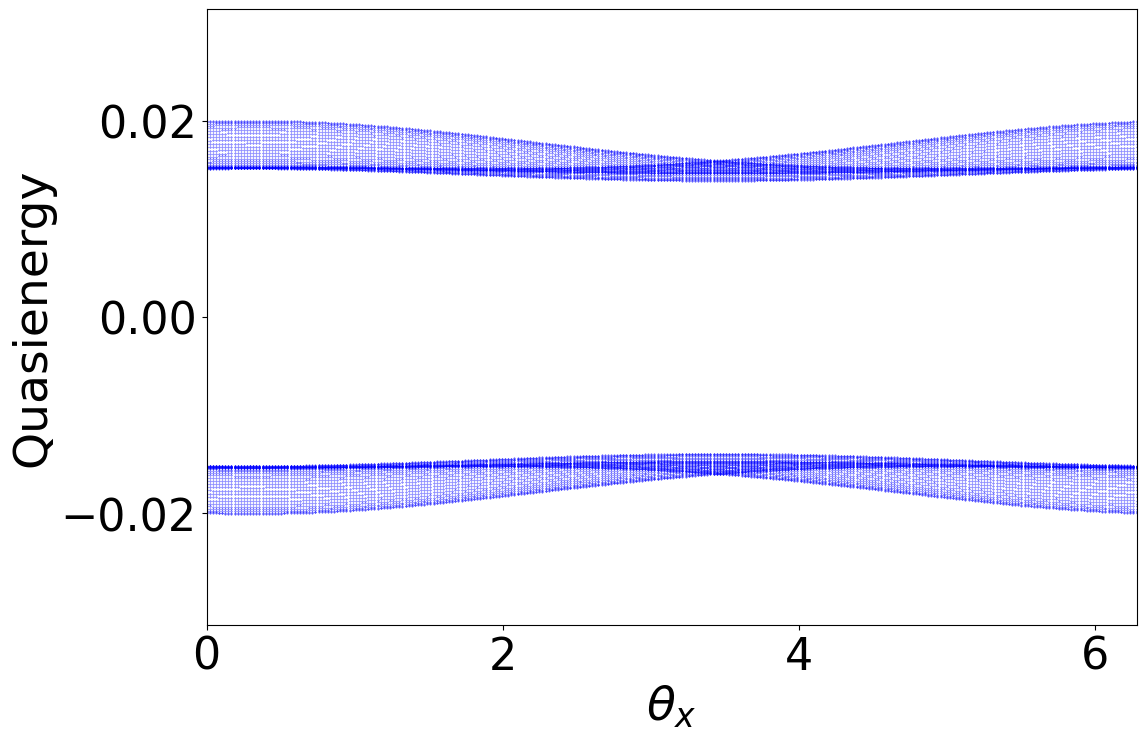

In [ ]:
eigvals, eigvecs = model_test_tbc0.quasienergies_states_edge(vd0, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd1 = np.pi/(3 * period)

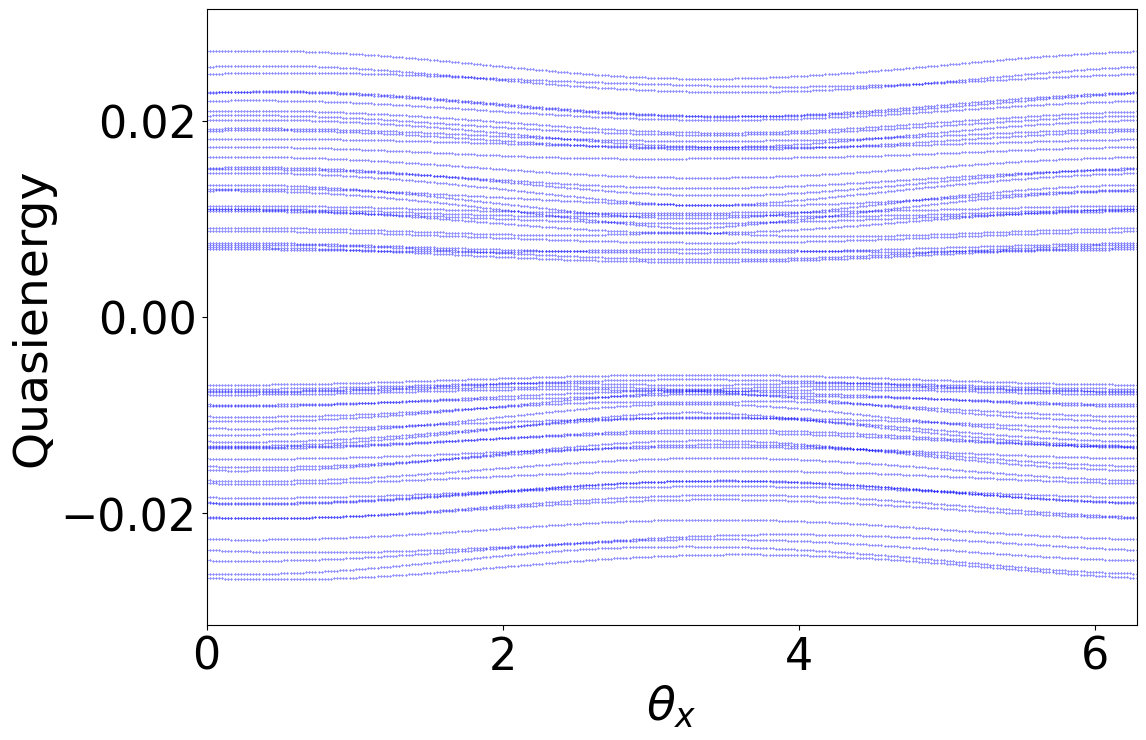

In [ ]:
eigvals, eigvecs = model_test_tbc0.quasienergies_states_edge(vd1, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=True)

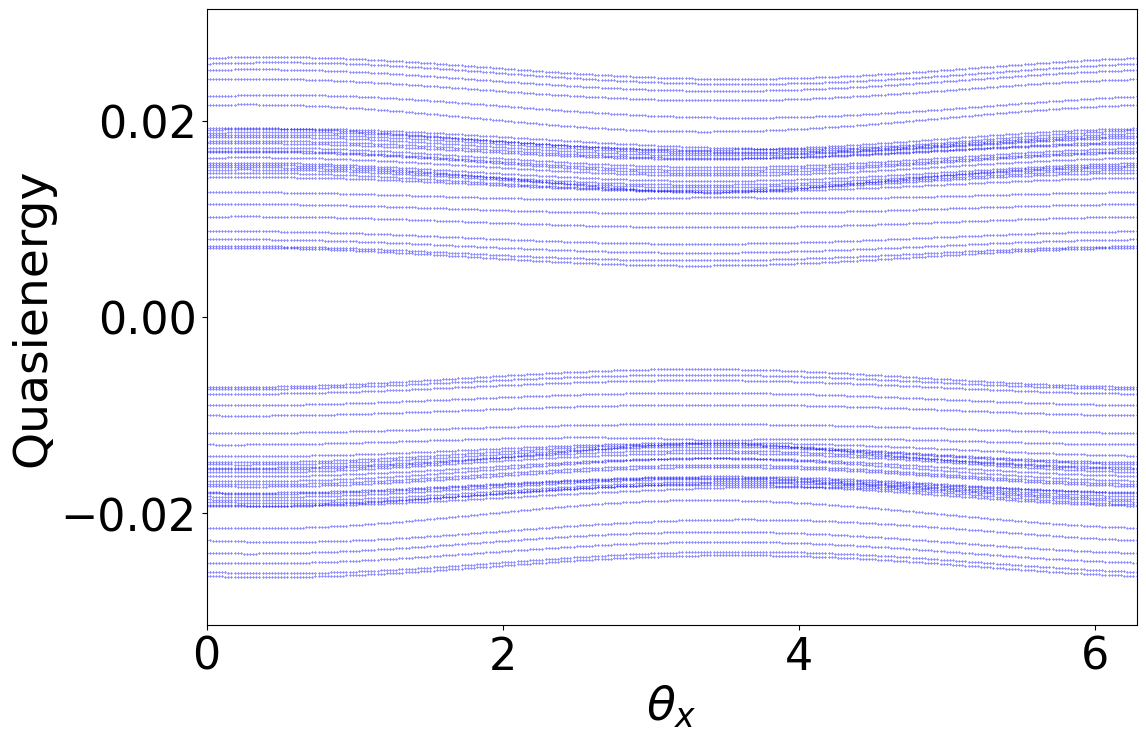

In [ ]:
eigvals, eigvecs = model_test_tbc0.quasienergies_states_edge(vd1, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
a = 1 ## Lattice constant
period = 100
hopping = - 5* np.pi/(2* period)
n = 22 # number of sites along y

In [ ]:
model_test_tbc_cd = afai_cuda.tb_floquet_tbc_cuda(period, a, hopping, n)

In [ ]:
vd0 = np.pi/(20 * period)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor2 = torch.tensor(theta_x, dtype=torch.float, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor4 = torch.tensor(theta_x, dtype=torch.float, device=self.device)


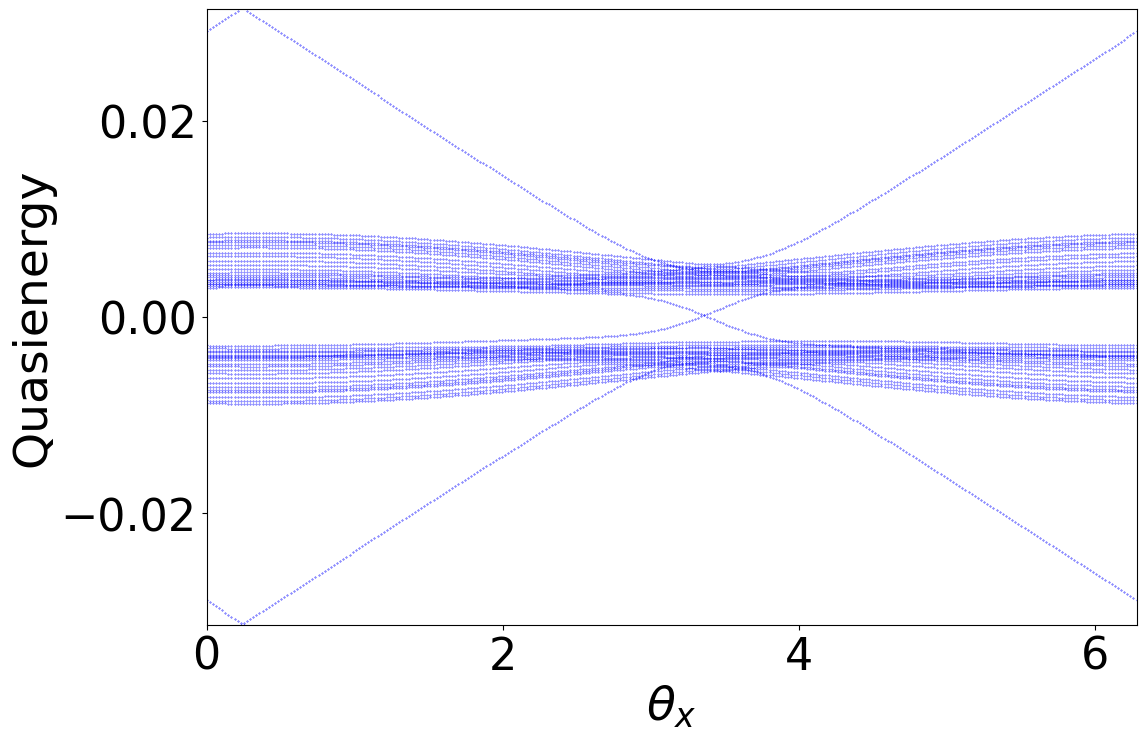

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

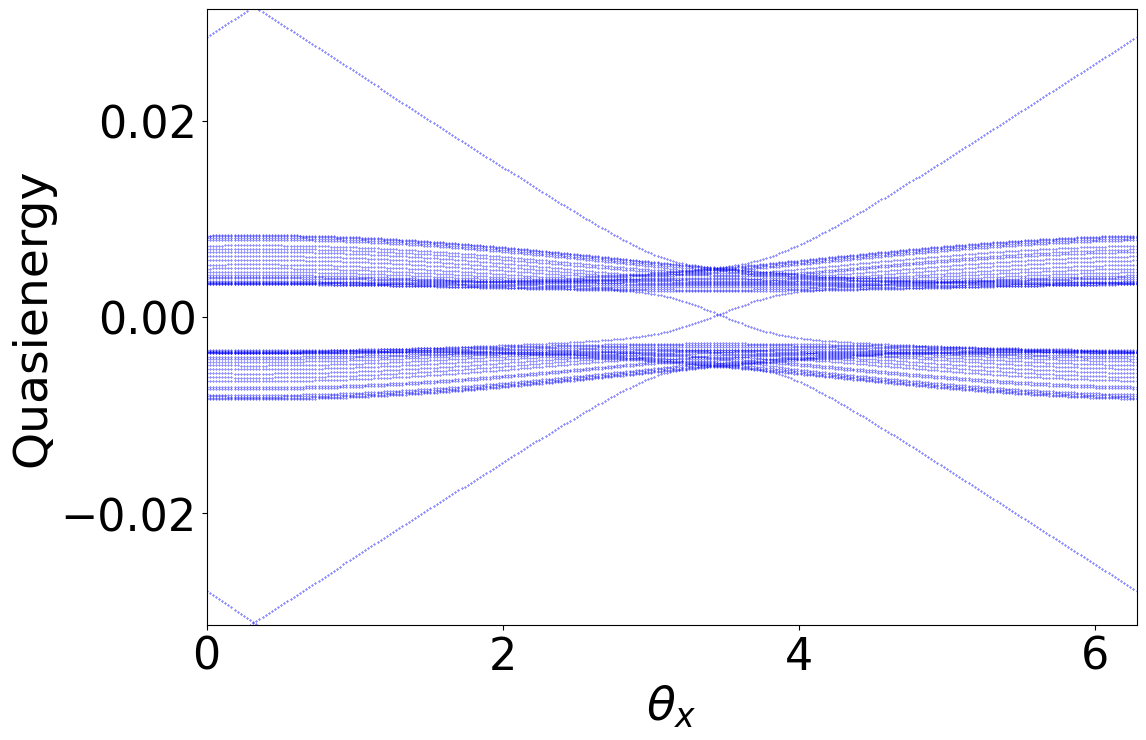

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, torch.tensor(np.pi/4), theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(6 * period)

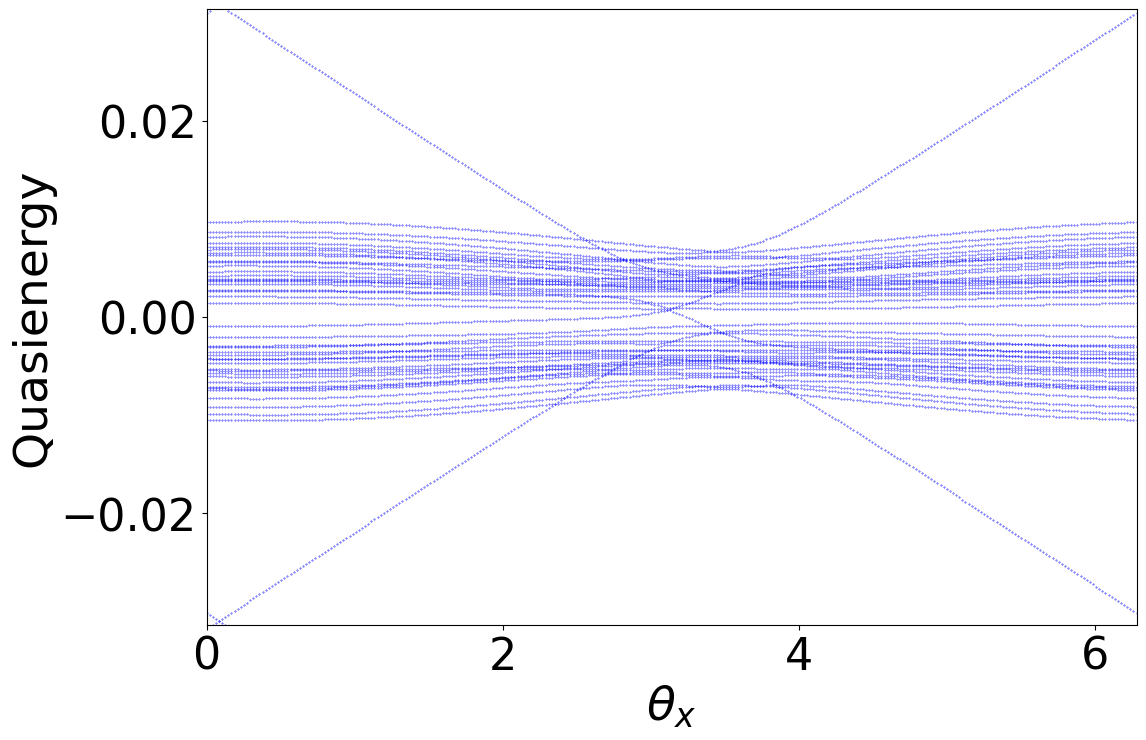

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

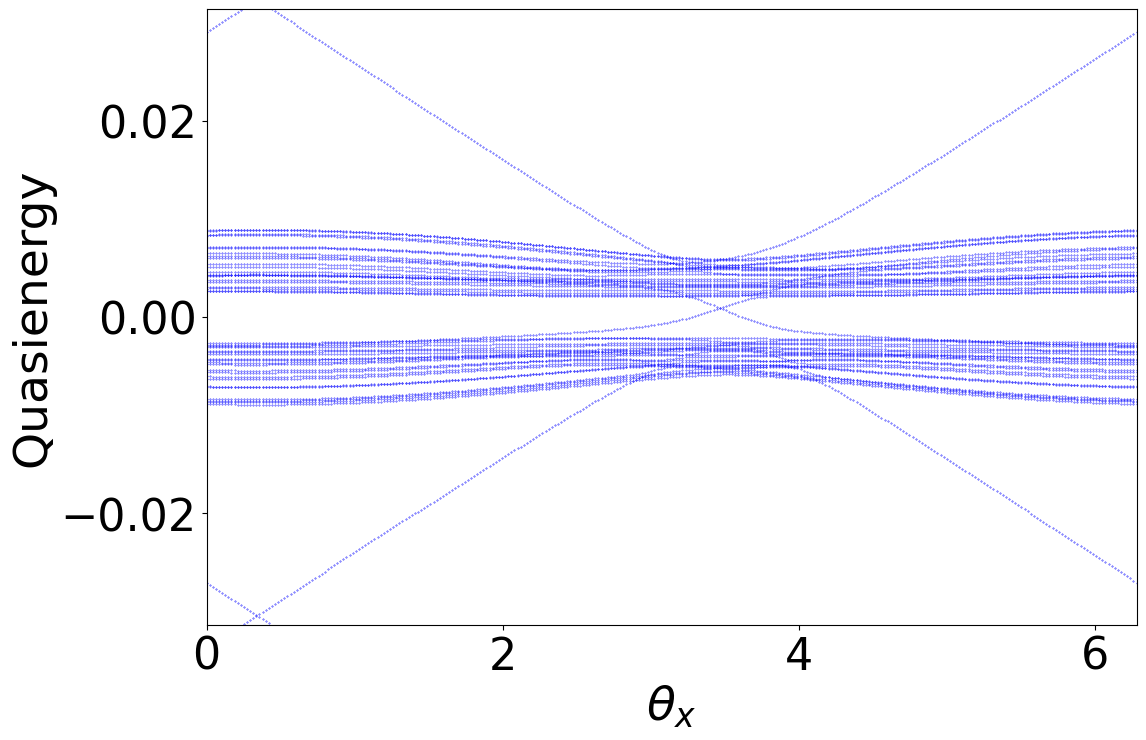

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, torch.tensor(np.pi/4), theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(2 * period)

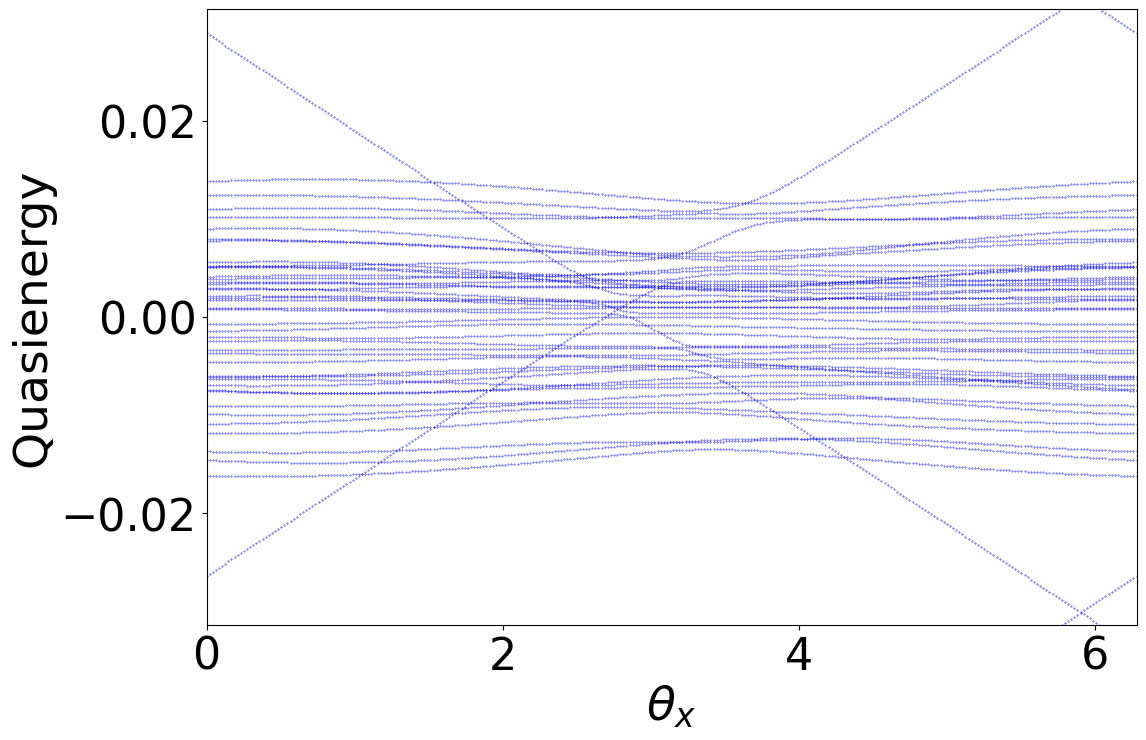

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor2 = torch.tensor(theta_x, dtype=torch.float, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor4 = torch.tensor(theta_x, dtype=torch.float, device=self.device)


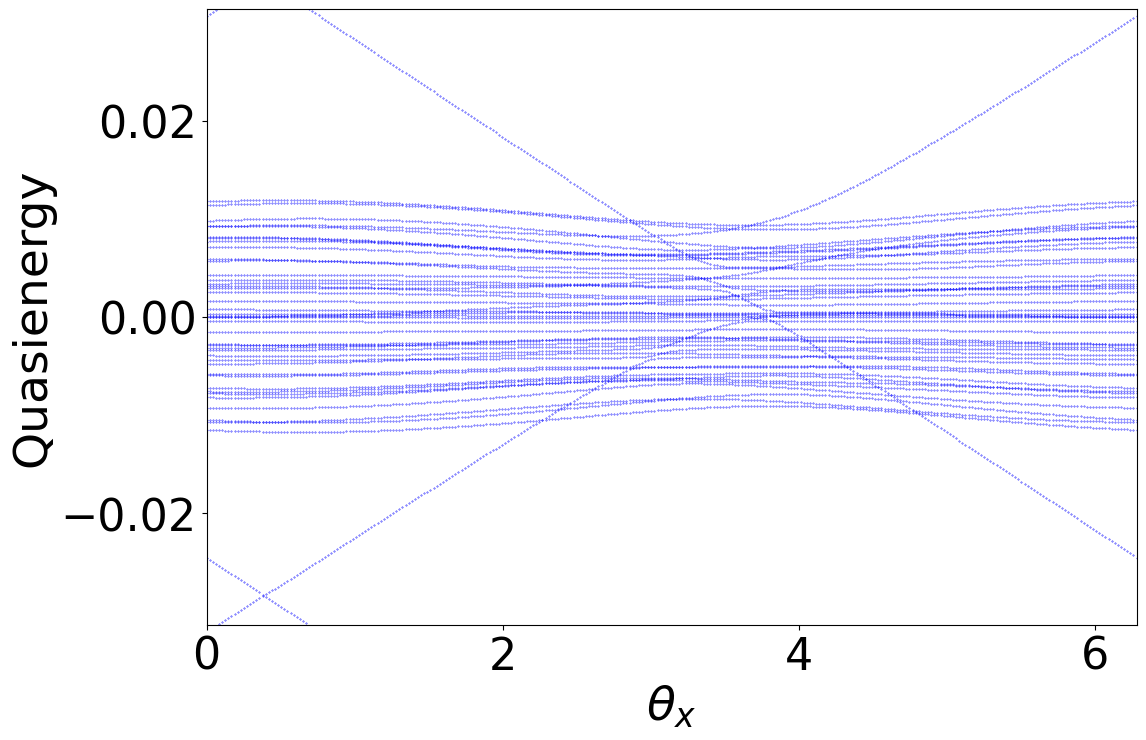

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, torch.tensor(np.pi/4), theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(0.8 * period)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor2 = torch.tensor(theta_x, dtype=torch.float, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor4 = torch.tensor(theta_x, dtype=torch.float, device=self.device)


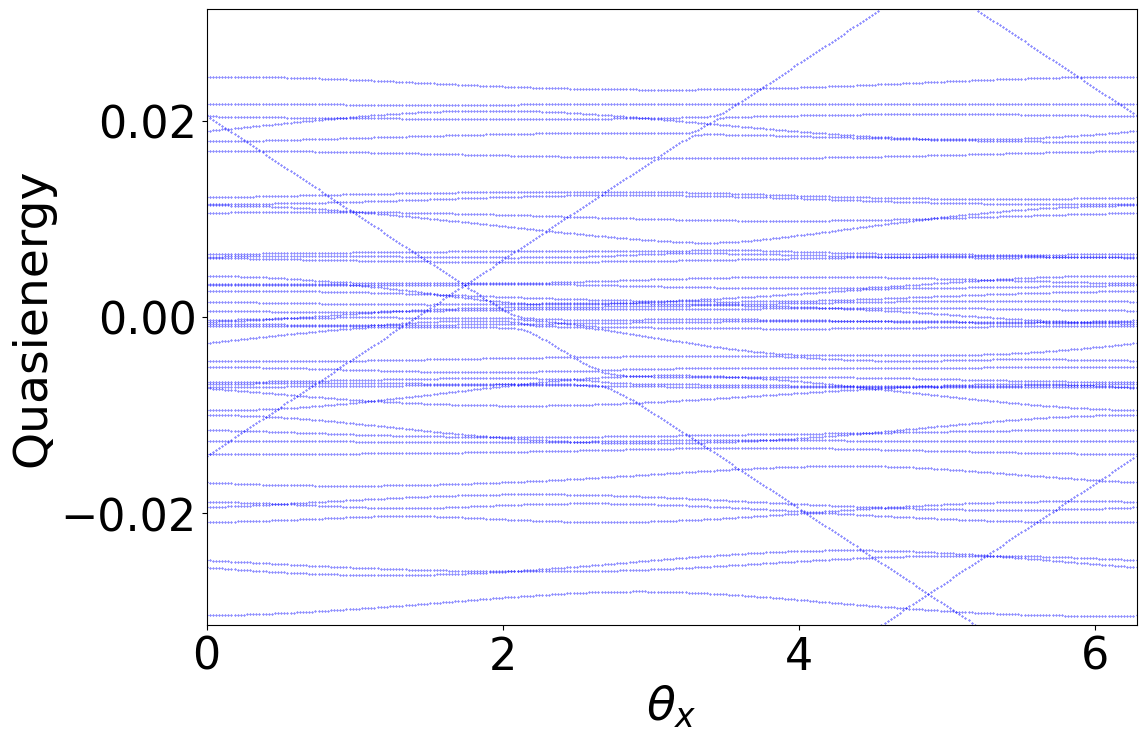

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

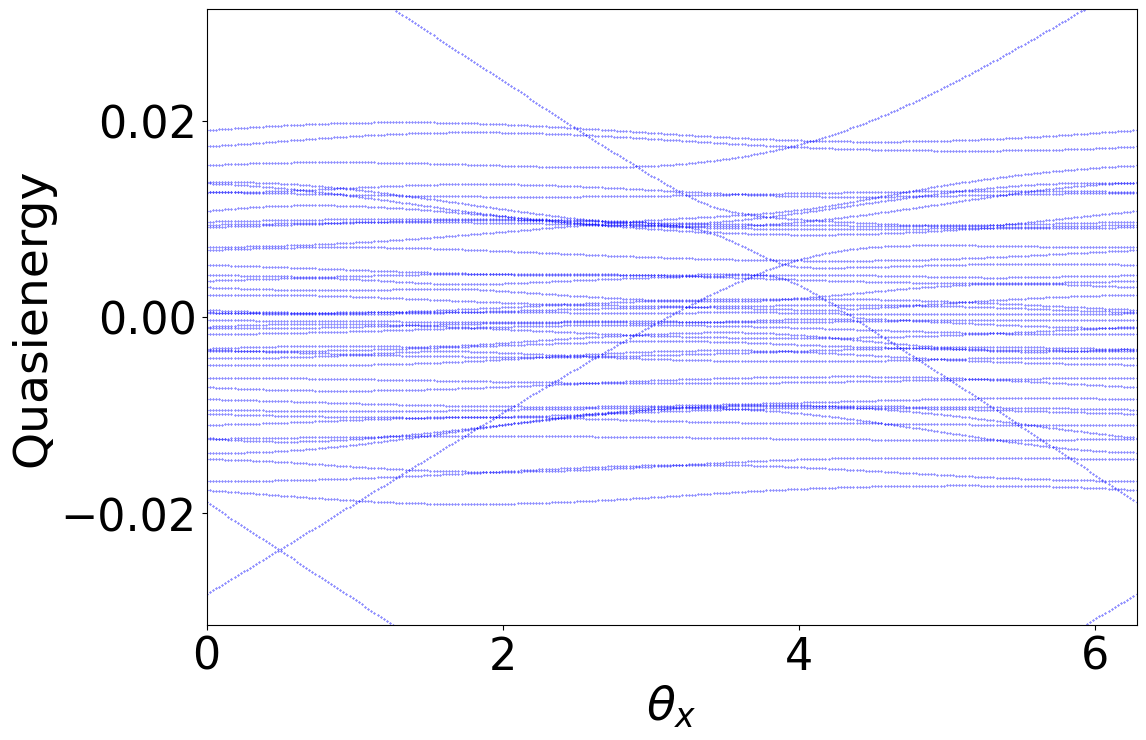

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, torch.tensor(np.pi/4), theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(0.3 * period)

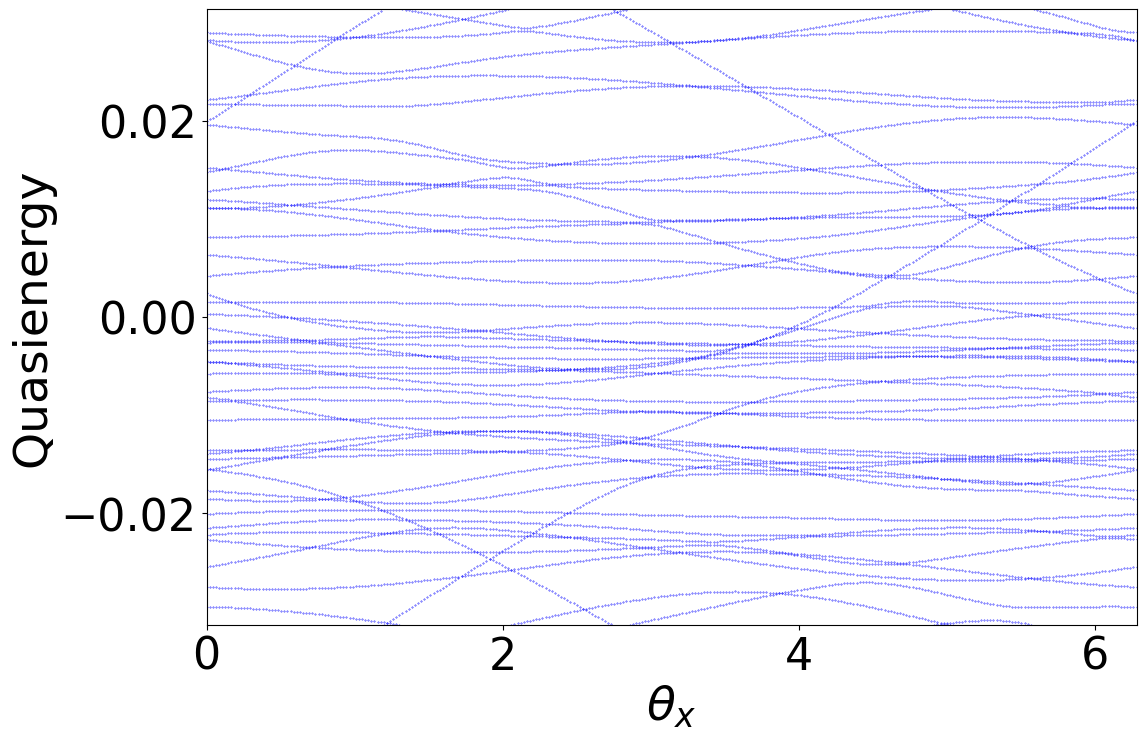

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

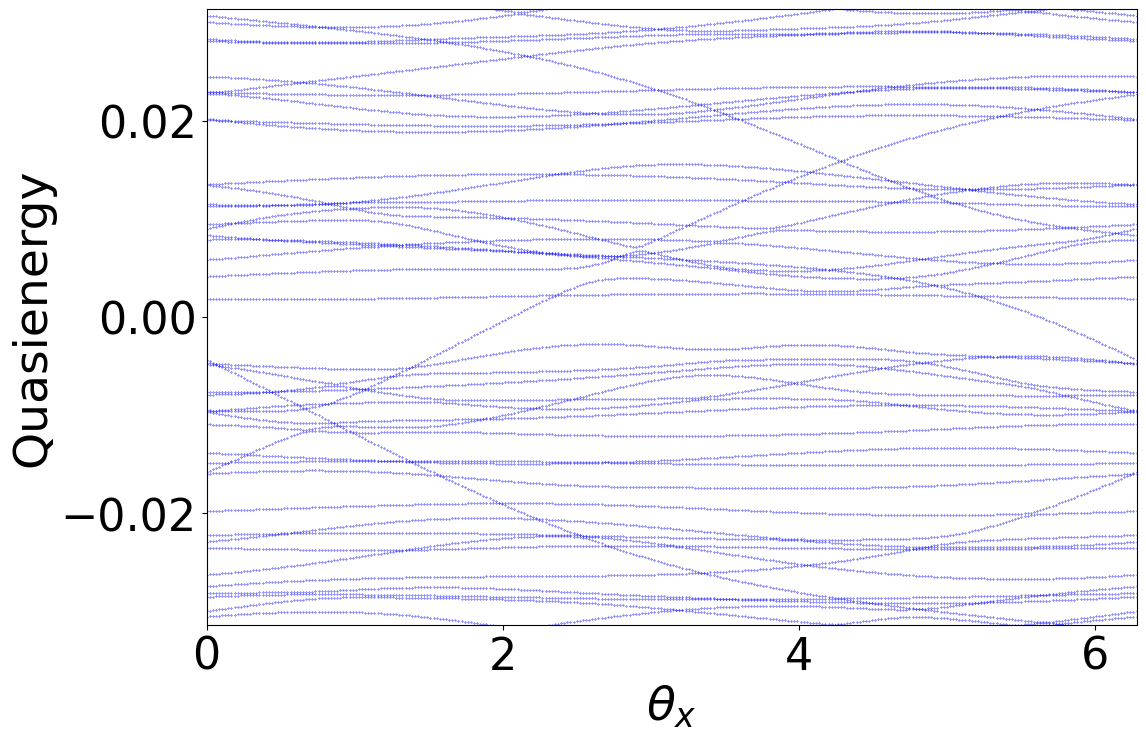

In [ ]:
eigvals, eigvecs = model_test_tbc_cd.quasienergies_states_edge(vd0, torch.tensor(np.pi/4), theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(2* period)

In [ ]:
a = 1 ## Lattice constant
period = 100
hopping = - np.pi/(2* period)
n = 40 # number of sites along x and y

In [ ]:
model_test_tbc = afai_cuda.tb_floquet_tbc_cuda(period, a, hopping, n, n)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:330: UserWarning: FixedFormatter should only be used together with FixedLocator
  


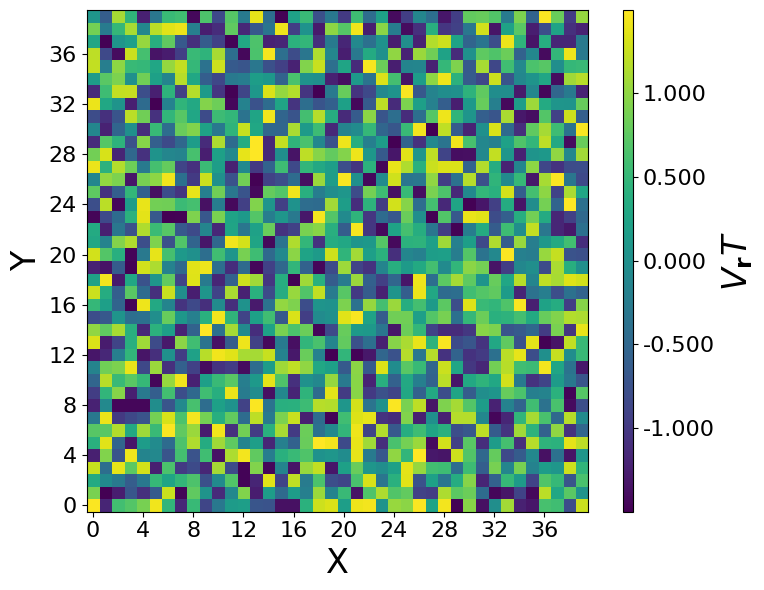

In [ ]:
path = "disorder_profile.pdf"
disorder = model_test_tbc.Hamiltonian_disorder(0.015,True, save_path=path)

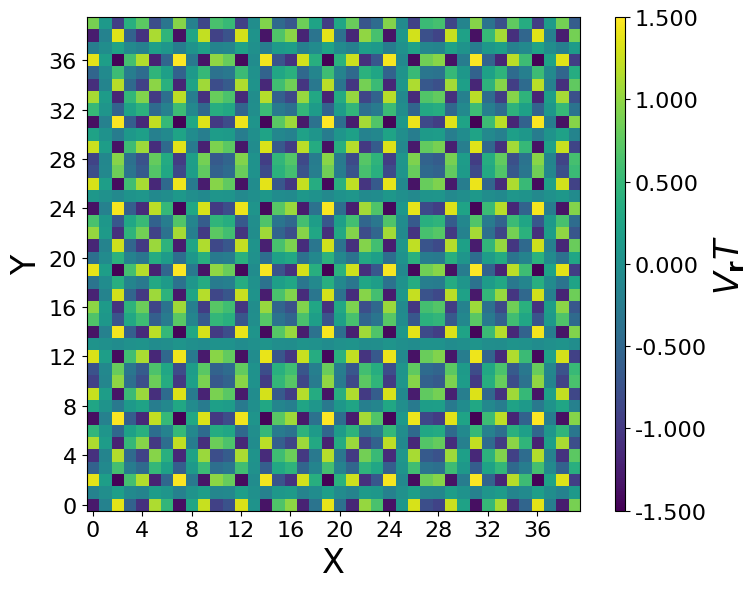

In [ ]:
path = "qc_profile.pdf"
aperiodic = model_test_tbc.aperiodic_Honsite(0.015, phi1_ex=0, phi2_ex=np.pi/4, contourplot=True, save_path=path)

In [ ]:
vd0 = np.pi/(300000 * period)

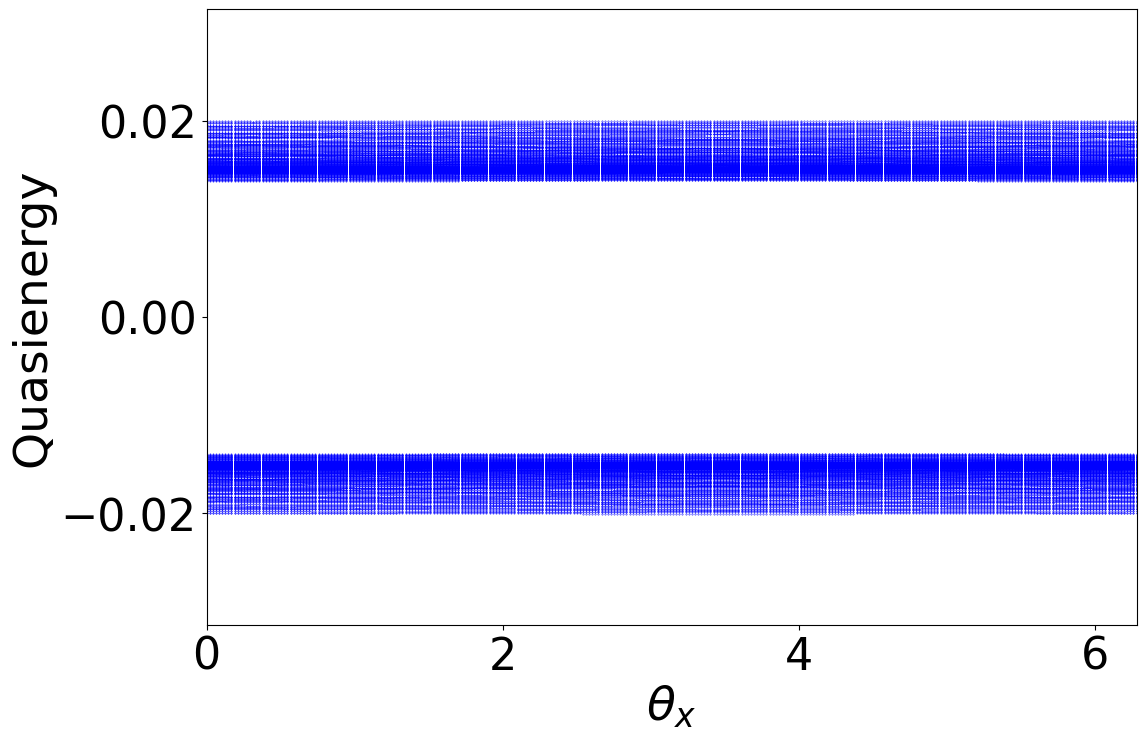

In [ ]:
eigvals, eigvecs = model_test_tbc.quasienergies_states_edge(vd0, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=True)

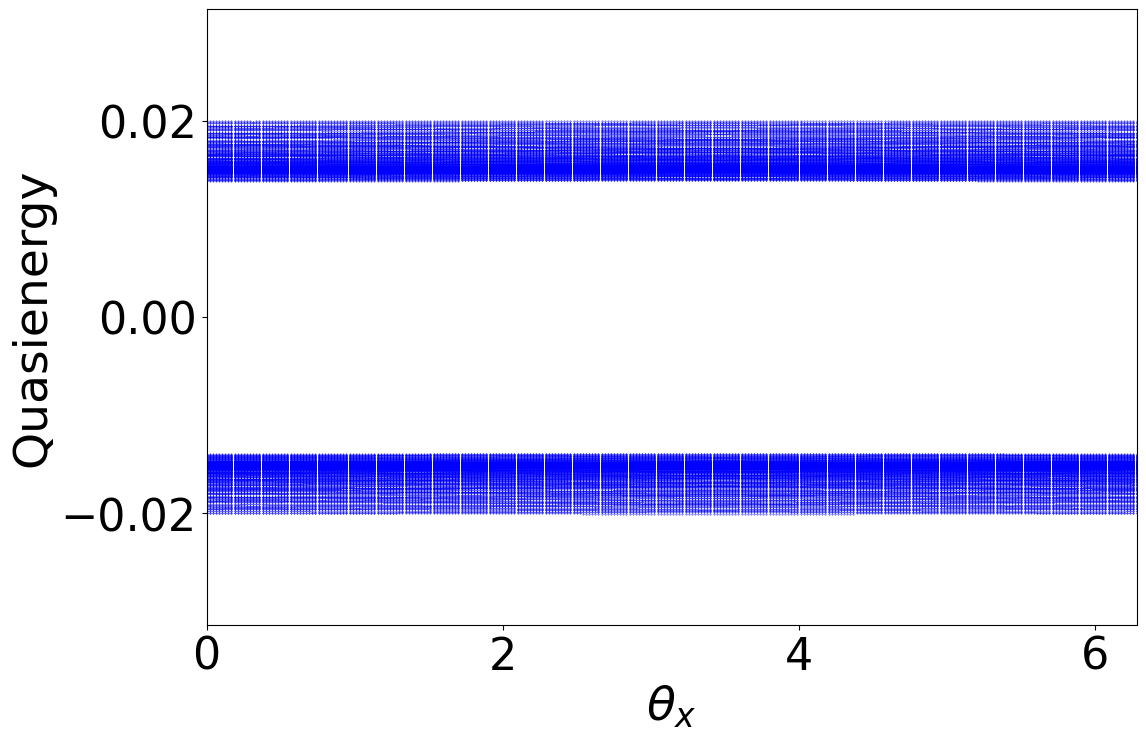

In [ ]:
eigvals, eigvecs = model_test_tbc.quasienergies_states_edge(vd0, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd1 = np.pi/(3 * period)

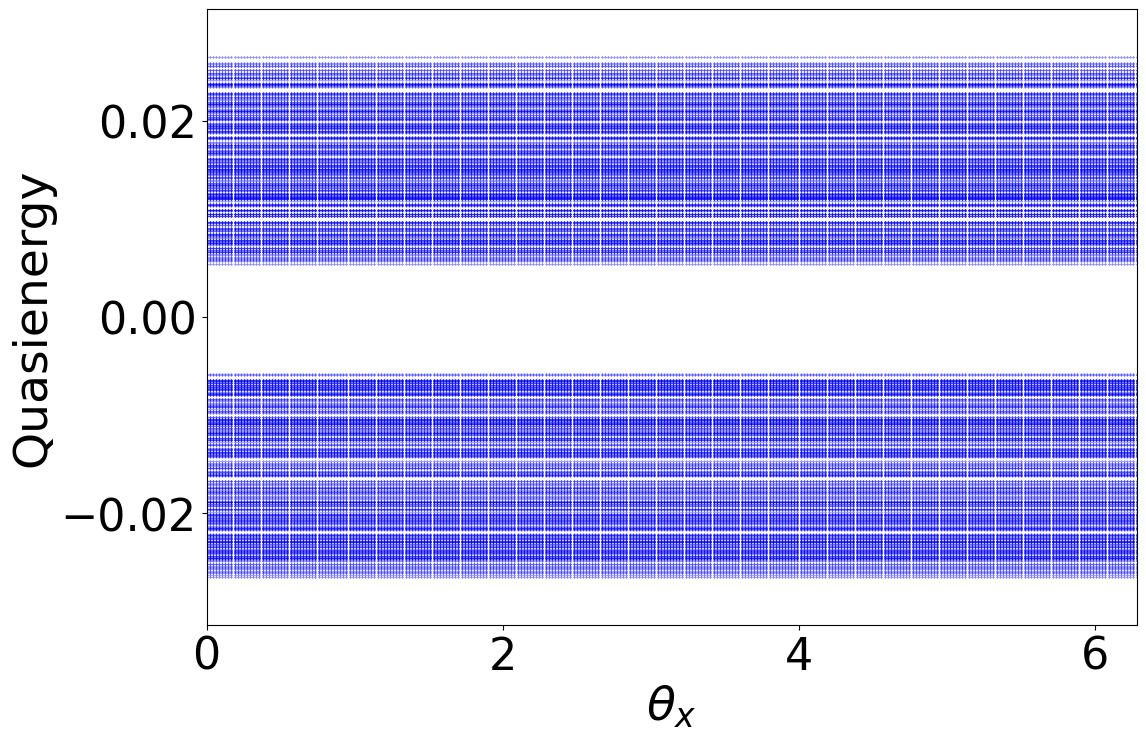

In [ ]:
eigvals, eigvecs = model_test_tbc.quasienergies_states_edge(vd1, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=True)

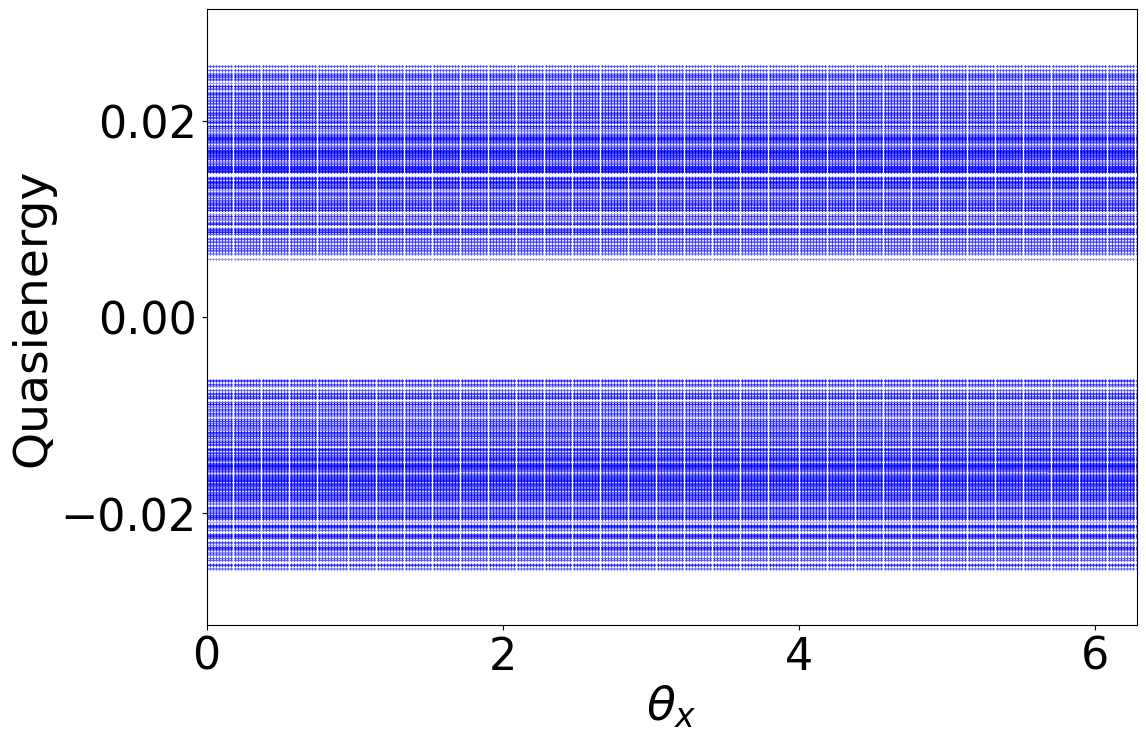

In [ ]:
eigvals, eigvecs = model_test_tbc.quasienergies_states_edge(vd1, np.pi/4, 20, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
a = 1 ## Lattice constant
period = 100
hopping = - 5*np.pi/(2* period)
n = 22 # number of sites along x and y

In [ ]:
model_cuda = afai_cuda.tb_floquet_tbc_cuda(period, a, hopping, n,n)

In [ ]:
vd0 = np.pi/(20 * period)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor2 = torch.tensor(theta_x, dtype=torch.float, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor4 = torch.tensor(theta_x, dtype=torch.float, device=self.device)


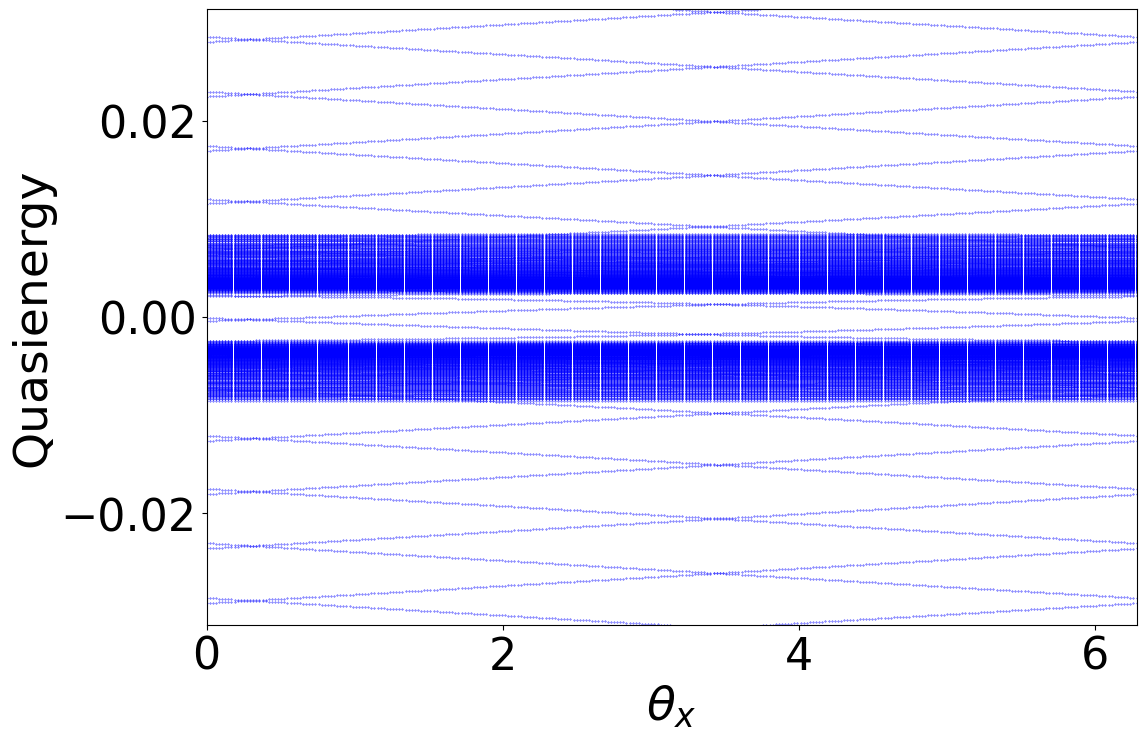

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor2 = torch.tensor(theta_x, dtype=torch.float, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor4 = torch.tensor(theta_x, dtype=torch.float, device=self.device)


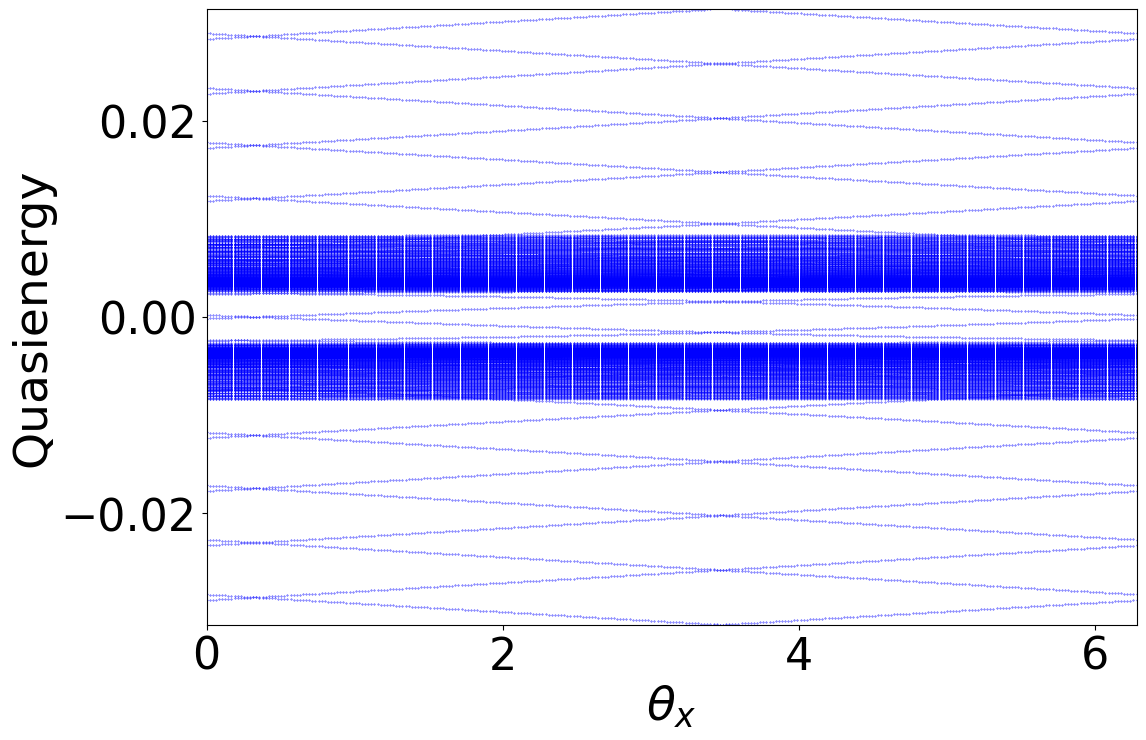

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(6 * period)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor2 = torch.tensor(theta_x, dtype=torch.float, device=self.device)
c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Floquet\AFAI_library_torch.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta_x_tensor4 = torch.tensor(theta_x, dtype=torch.float, device=self.device)


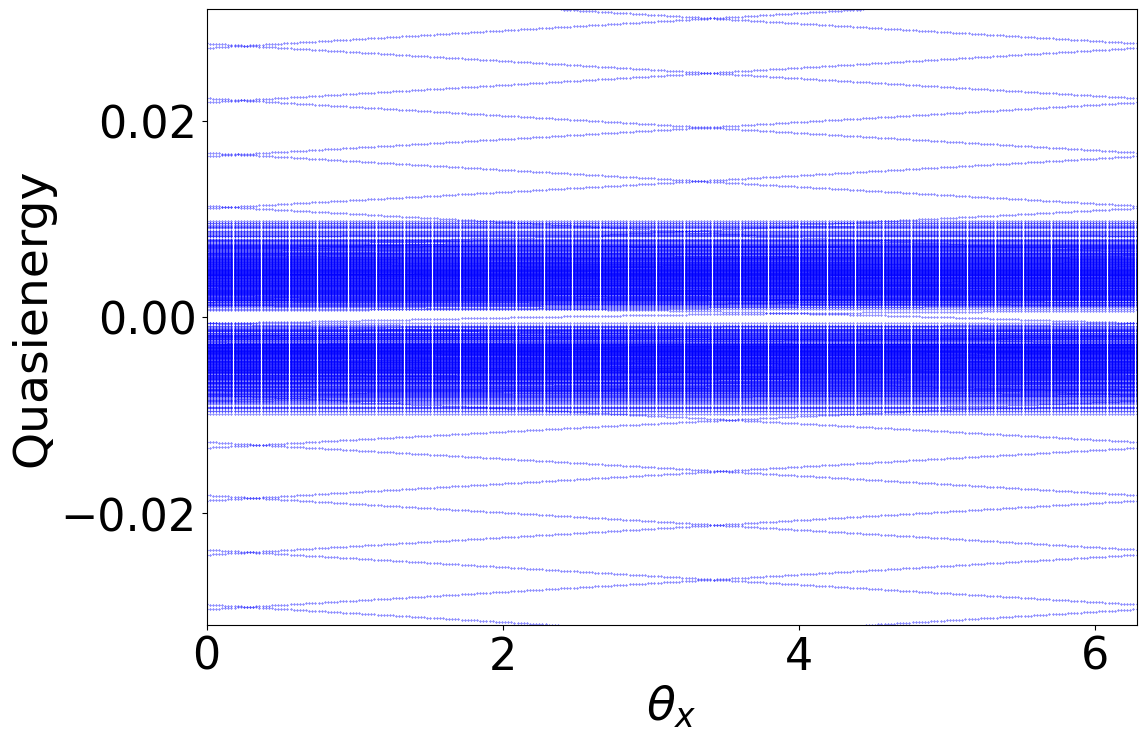

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

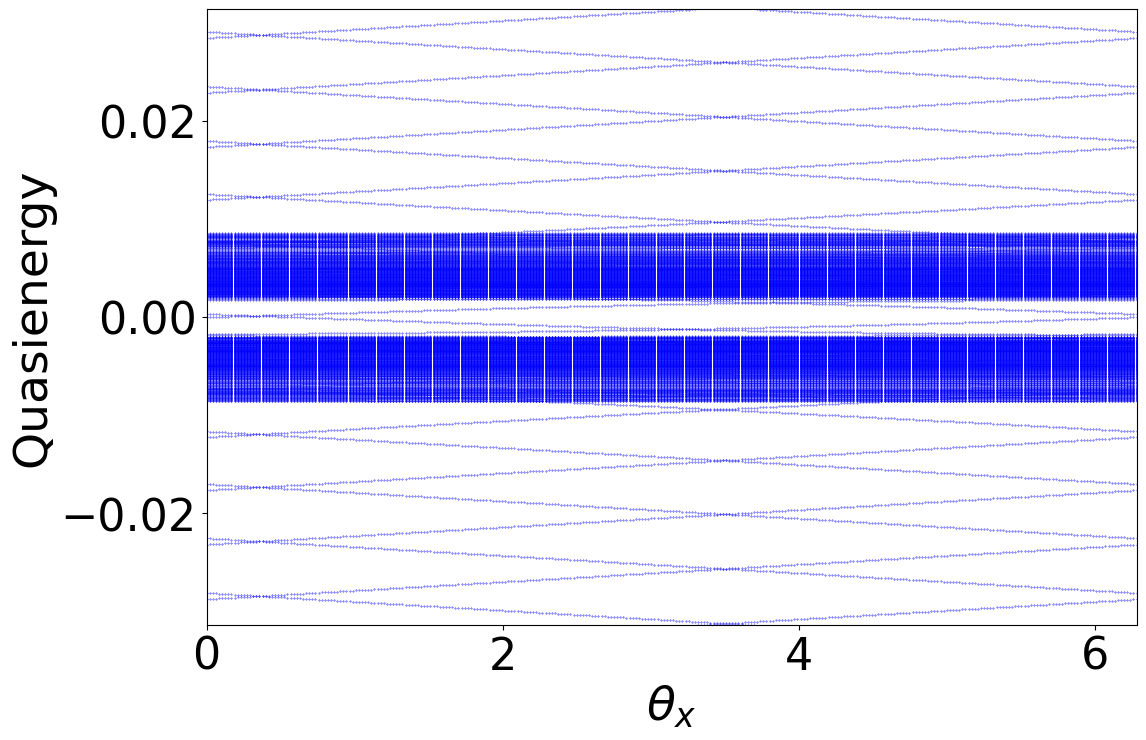

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(2 * period)

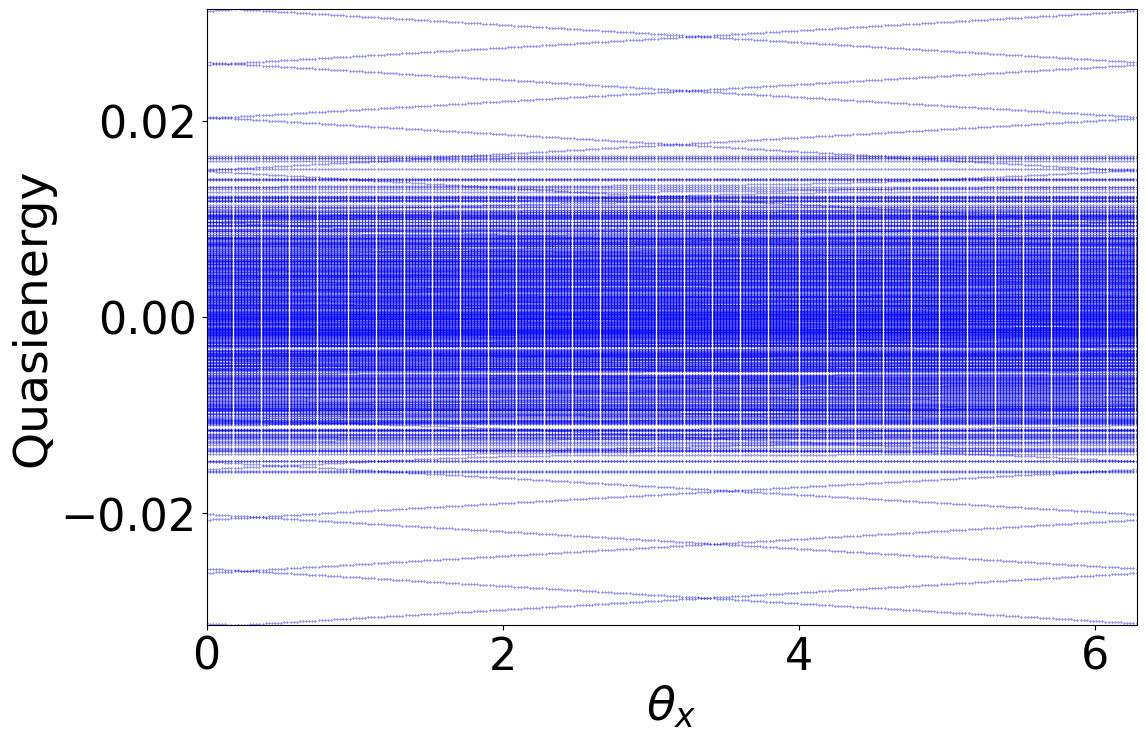

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

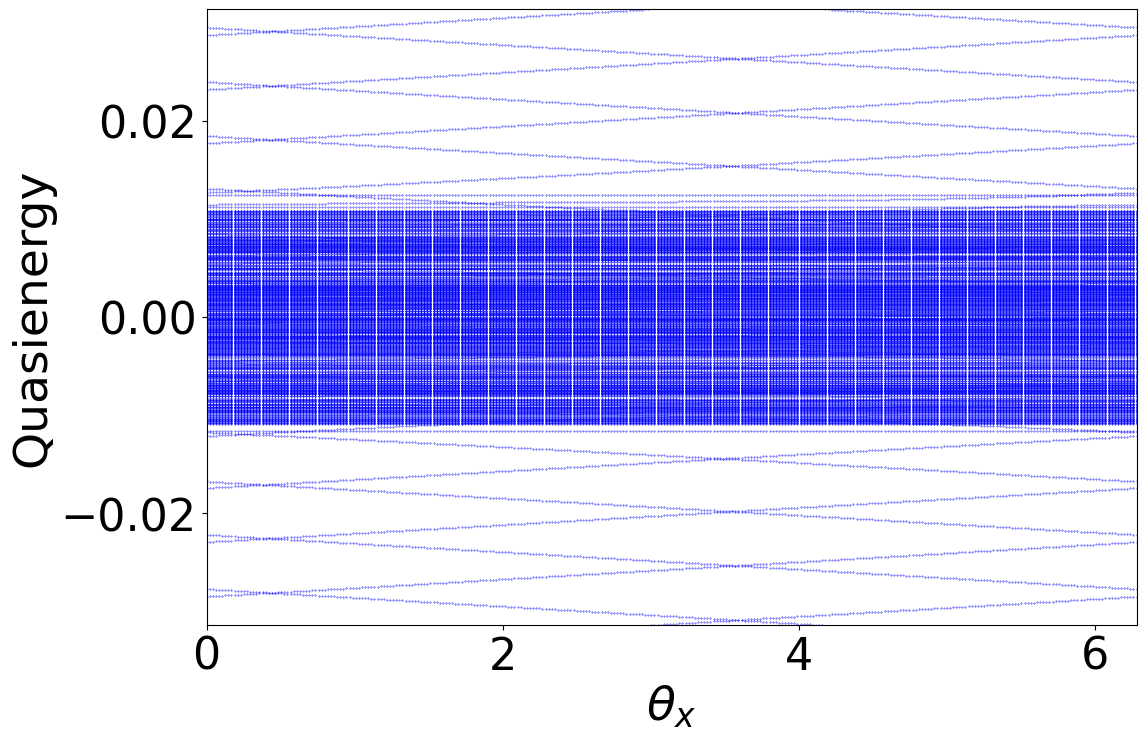

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(0.8 * period)

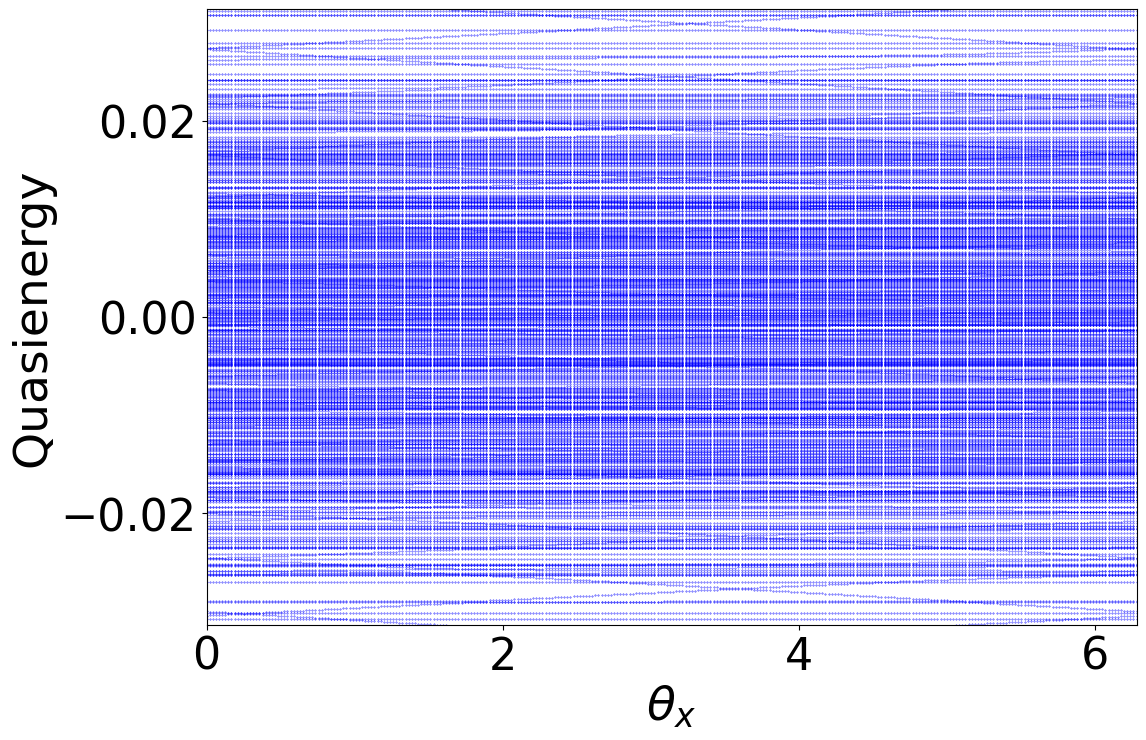

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

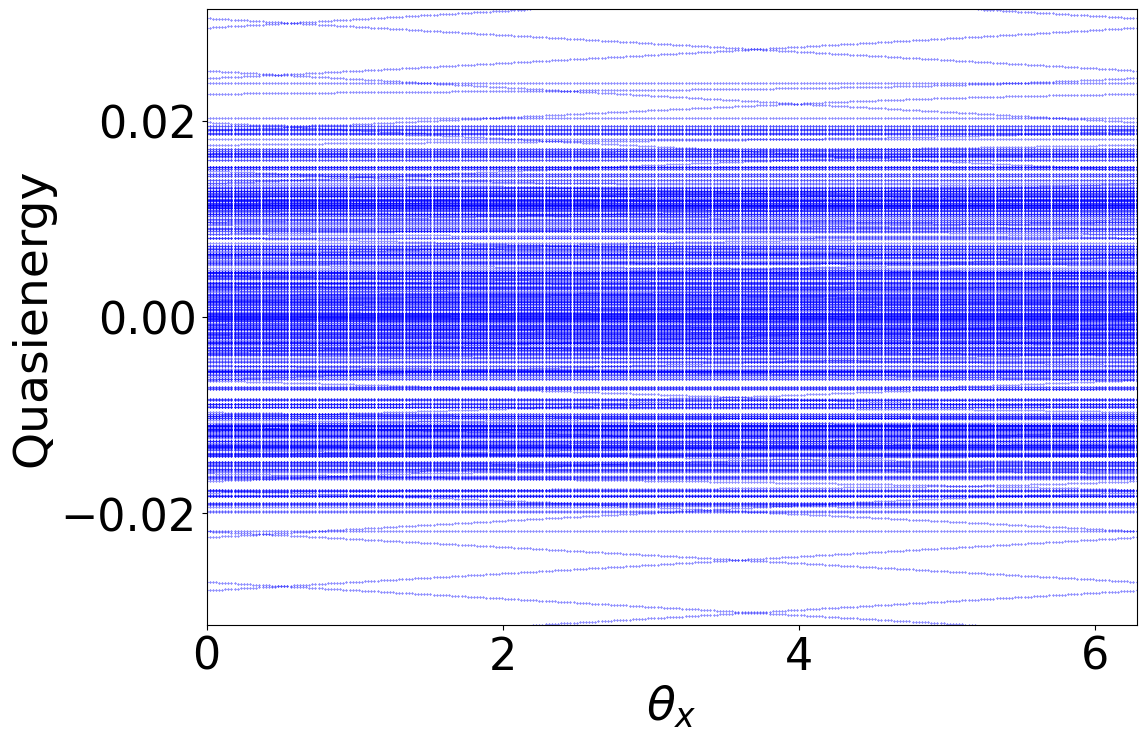

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
vd0 = np.pi/(0.3 * period)

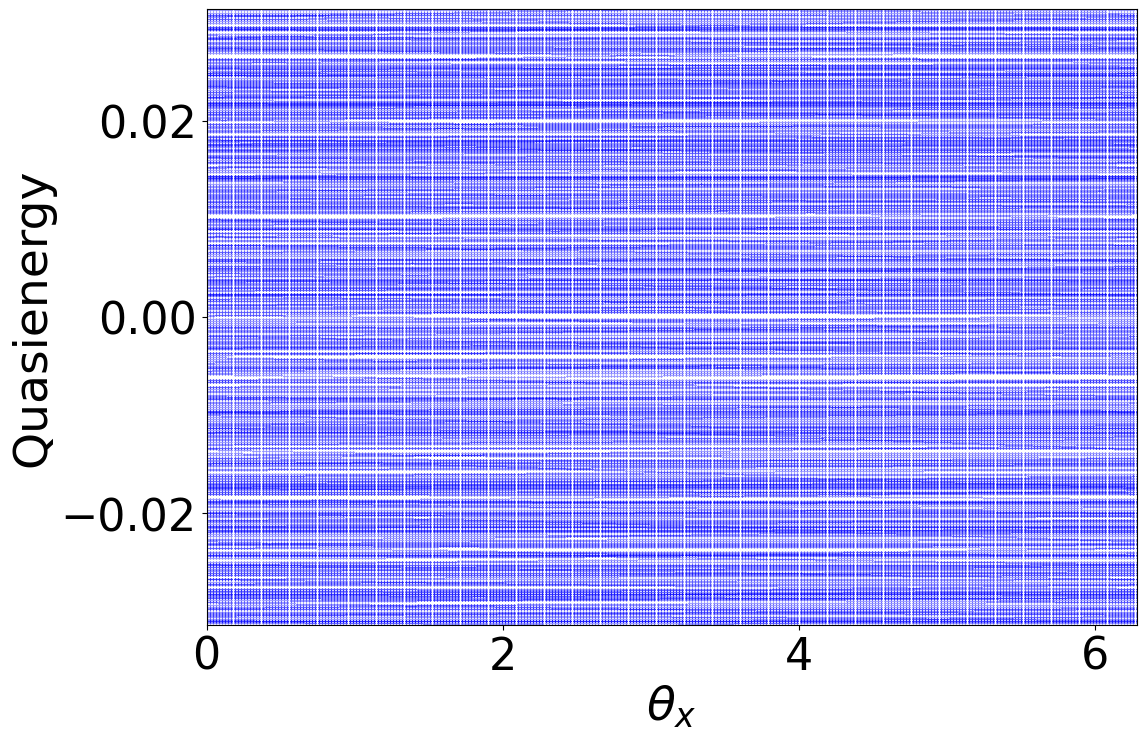

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=True)

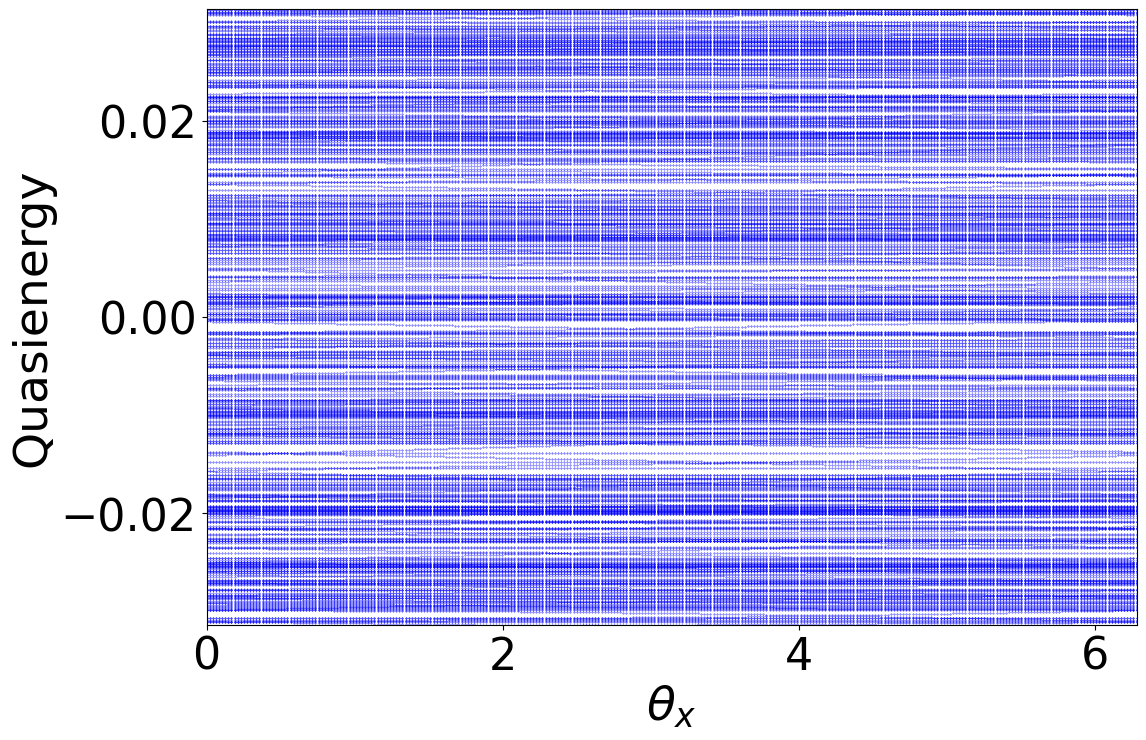

In [ ]:
eigvals, eigvecs = model_cuda.quasienergies_states_edge(vd0, np.pi/4, theta_x_num= 300, plot = True, fully_disorder=False)

In [ ]:
def check_diagonal_symmetry(H_ap):
    """
    Check if the matrix H_ap is symmetric along the main diagonal and the anti-diagonal,
    and return the number of differing sites if not symmetric.
    
    Args:
    - H_ap (numpy.ndarray): A 2D numpy array representing the potential on a lattice.
    
    Returns:
    - tuple: (main_diagonal_symmetry, anti_diagonal_symmetry, main_diagonal_diff_sites, anti_diagonal_diff_sites)
      - main_diagonal_symmetry (bool): True if H_ap is symmetric about the main diagonal.
      - anti_diagonal_symmetry (bool): True if H_ap is symmetric about the anti-diagonal.
      - main_diagonal_diff_sites (int): Number of sites that differ across the main diagonal if not symmetric.
      - anti_diagonal_diff_sites (int): Number of sites that differ across the anti-diagonal if not symmetric.
    """
    # Symmetry across the main diagonal (top-left to bottom-right)
    main_diagonal_symmetry = np.allclose(H_ap, H_ap.T)
    
    # Symmetry across the anti-diagonal (top-right to bottom-left)
    # Flip the matrix along the vertical axis and then check for main diagonal symmetry
    flipped_H_ap = np.fliplr(H_ap)
    anti_diagonal_symmetry = np.allclose(flipped_H_ap, flipped_H_ap.T)
    
    # Count the number of differing sites if not symmetric
    if not main_diagonal_symmetry:
        main_diagonal_diff_sites = np.sum(~np.isclose(H_ap, H_ap.T))
    else:
        main_diagonal_diff_sites = 0
    
    if not anti_diagonal_symmetry:
        anti_diagonal_diff_sites = np.sum(~np.isclose(flipped_H_ap, flipped_H_ap.T))
    else:
        anti_diagonal_diff_sites = 0
    
    return main_diagonal_symmetry, anti_diagonal_symmetry, main_diagonal_diff_sites, anti_diagonal_diff_sites

In [ ]:
def check_horizontal_vertical_symmetry(H_ap):
    """
    Check if the matrix H_ap is symmetric along the horizontal and vertical axes.
    
    Args:
    - H_ap (numpy.ndarray): A 2D numpy array representing the potential on a lattice.
    
    Returns:
    - tuple: (horizontal_symmetry, vertical_symmetry, horizontal_diff_sites, vertical_diff_sites)
      - horizontal_symmetry (bool): True if H_ap is symmetric about the horizontal axis.
      - vertical_symmetry (bool): True if H_ap is symmetric about the vertical axis.
      - horizontal_diff_sites (int): Number of sites that differ across the horizontal axis if not symmetric.
      - vertical_diff_sites (int): Number of sites that differ across the vertical axis if not symmetric.
    """
    rows, cols = H_ap.shape
    
    # Check symmetry across the horizontal axis
    upper_half = H_ap[:rows//2, :]
    lower_half = H_ap[rows//2:, :]
    flipped_lower_half = np.flipud(lower_half)
    
    horizontal_symmetry = np.allclose(upper_half, flipped_lower_half)
    horizontal_diff_sites = np.sum(~np.isclose(upper_half, flipped_lower_half))
    
    # Check symmetry across the vertical axis
    left_half = H_ap[:, :cols//2]
    right_half = H_ap[:, cols//2:]
    flipped_right_half = np.fliplr(right_half)
    
    vertical_symmetry = np.allclose(left_half, flipped_right_half)
    vertical_diff_sites = np.sum(~np.isclose(left_half, flipped_right_half))
    
    return horizontal_symmetry, vertical_symmetry, horizontal_diff_sites, vertical_diff_sites

In [7]:
a = 1 ## Lattice constant
period = 100
hopping = - 5*np.pi/(2* period)
n = 40

In [8]:
model_test_tbcl_cuda = afai_cuda.tb_floquet_tbc_cuda(period, a, hopping, n,n, 'cpu')

In [ ]:
vd_min = np.pi/(20*period)
vd_max = 5 * np.pi/(period)
vd_num = 50 # number of points for different disorder strength
N_dis= 30 # Averaging over N_dis disorder realizations

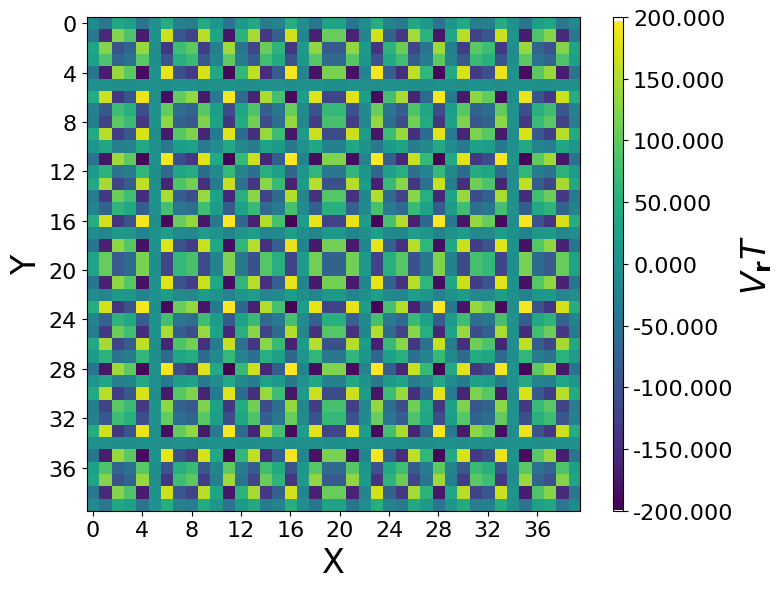

In [ ]:
contour, test0 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=0, phi2_ex=0,contourplot=True)

In [ ]:
check_diagonal_symmetry(test0)

(True, True, 0, 0)

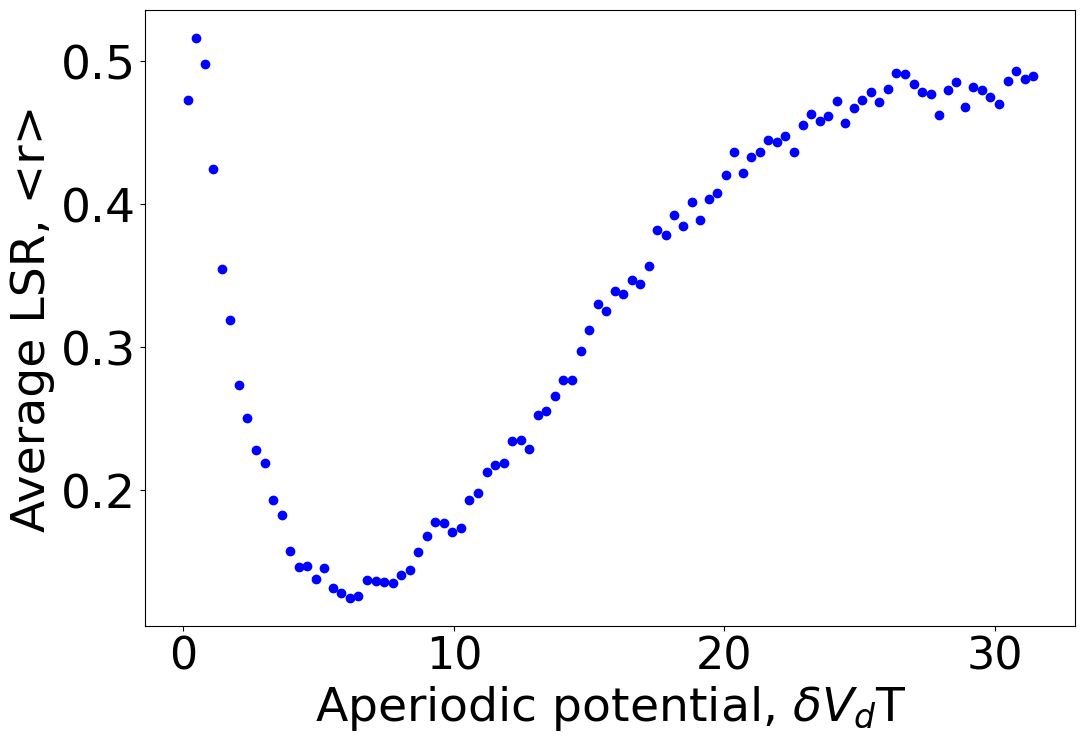

In [ ]:
plot = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=0, phi2_ex=0, fully_disorder=False,plot=True)

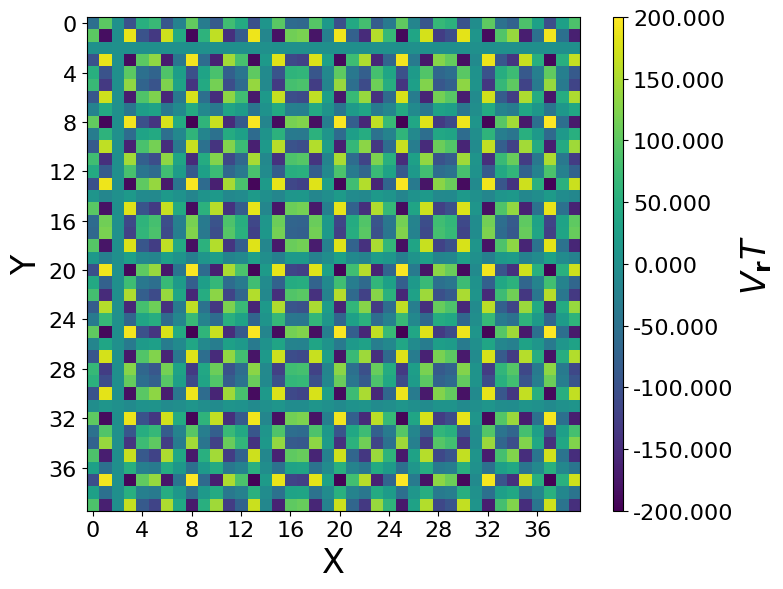

In [ ]:
contour, test1 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=0, phi2_ex=np.pi/2,contourplot=True)

In [ ]:
check_diagonal_symmetry(test1)

(True, False, 0, 1560)

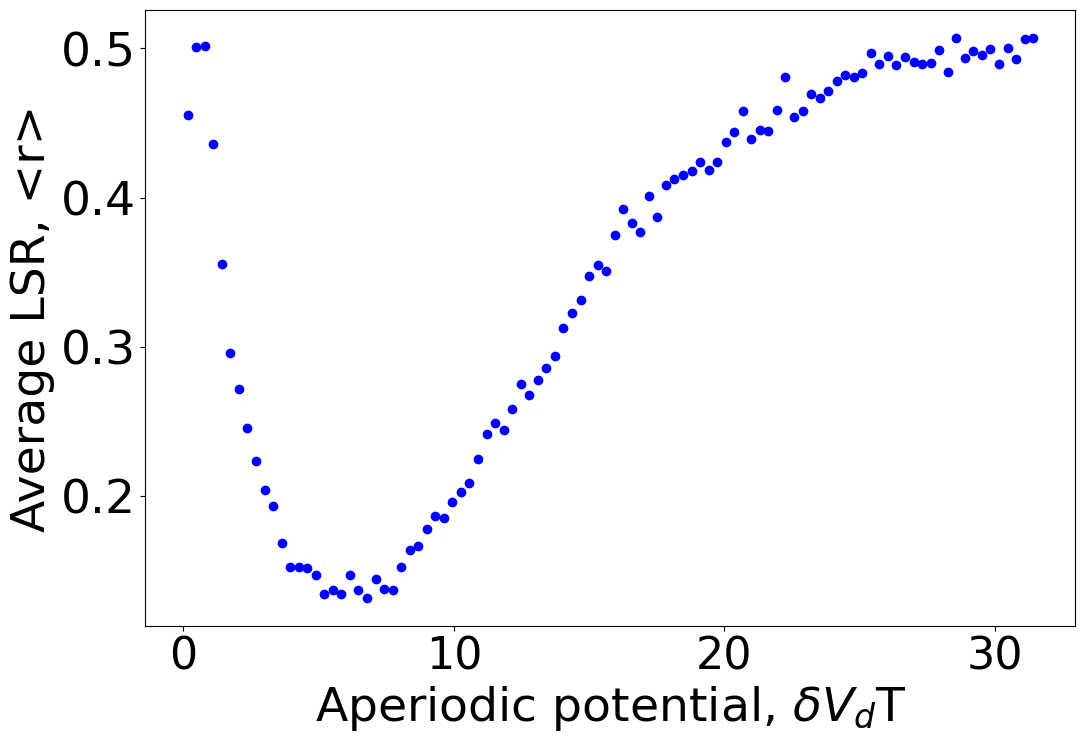

In [ ]:
plot1 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=0, phi2_ex=np.pi/2, fully_disorder=False,plot=True)

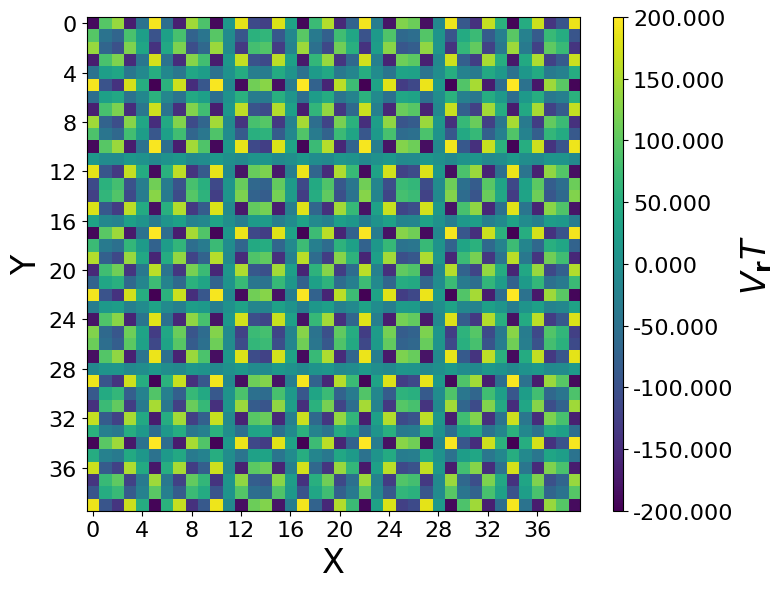

In [ ]:
contour, test2 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=0, phi2_ex=np.pi,contourplot=True)

In [ ]:
check_diagonal_symmetry(test2)

(True, False, 0, 180)

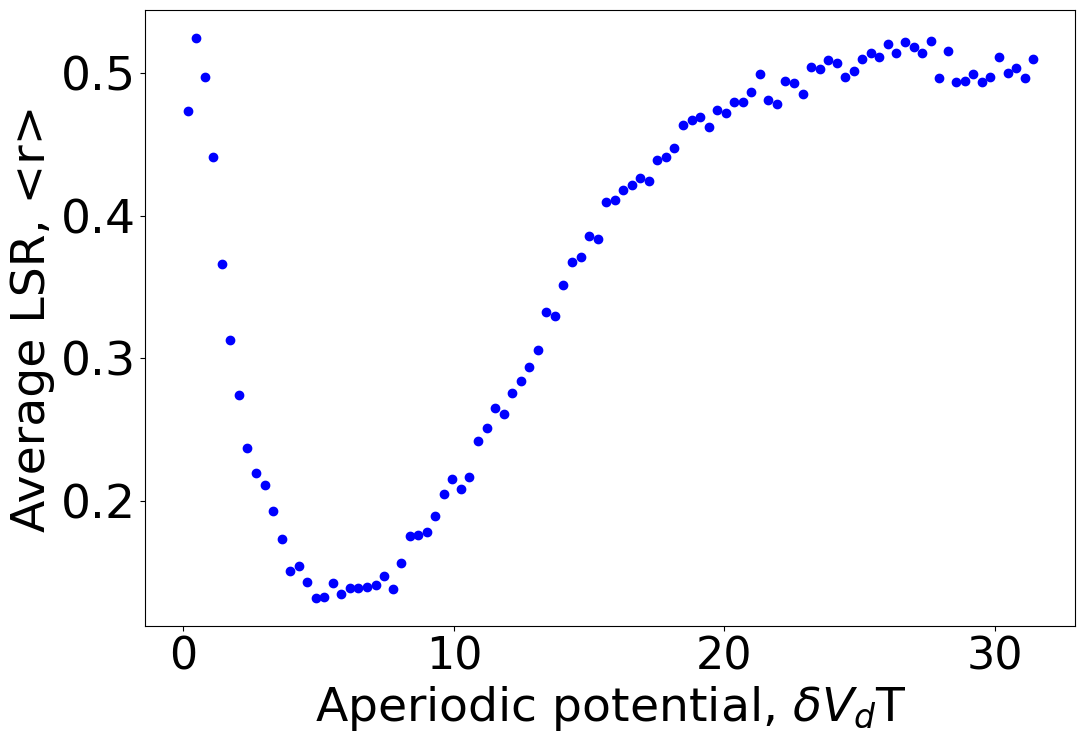

In [ ]:
plot2 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=0, phi2_ex=np.pi, fully_disorder=False,plot=True)

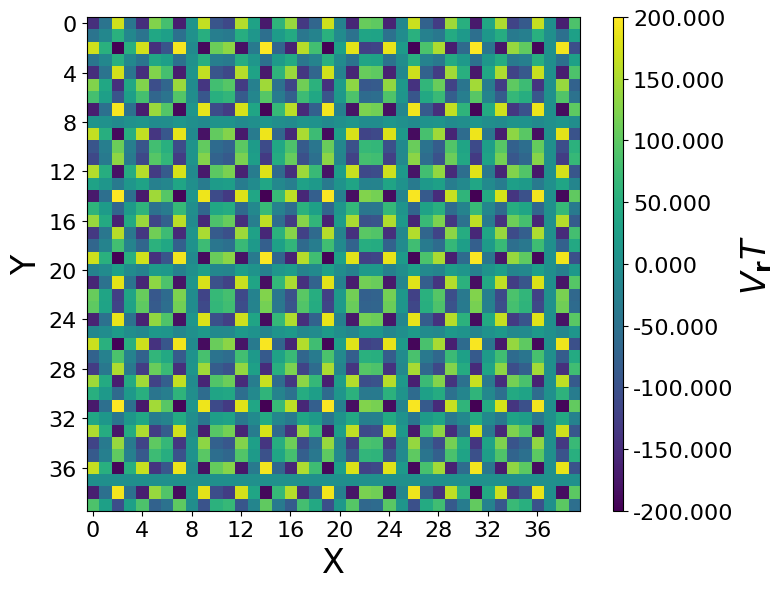

In [ ]:
contour,test21 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=0, phi2_ex=np.pi*3/2, contourplot=True)

In [ ]:
check_diagonal_symmetry(test21)

(True, False)

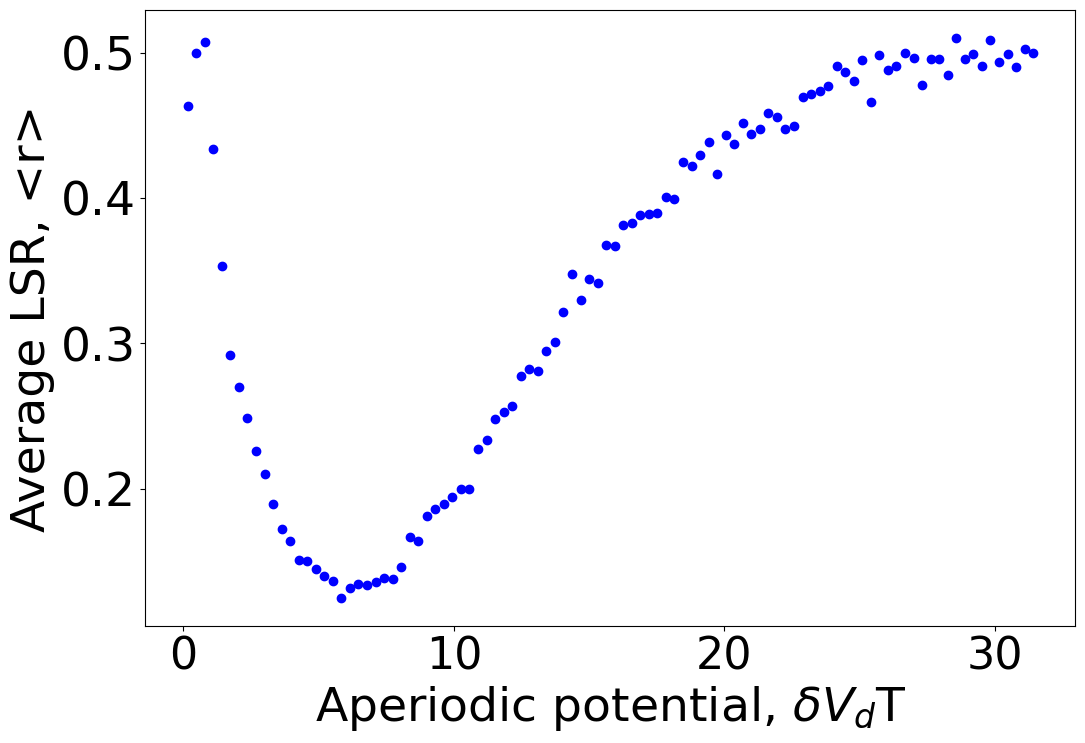

In [ ]:
plot20 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=0, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

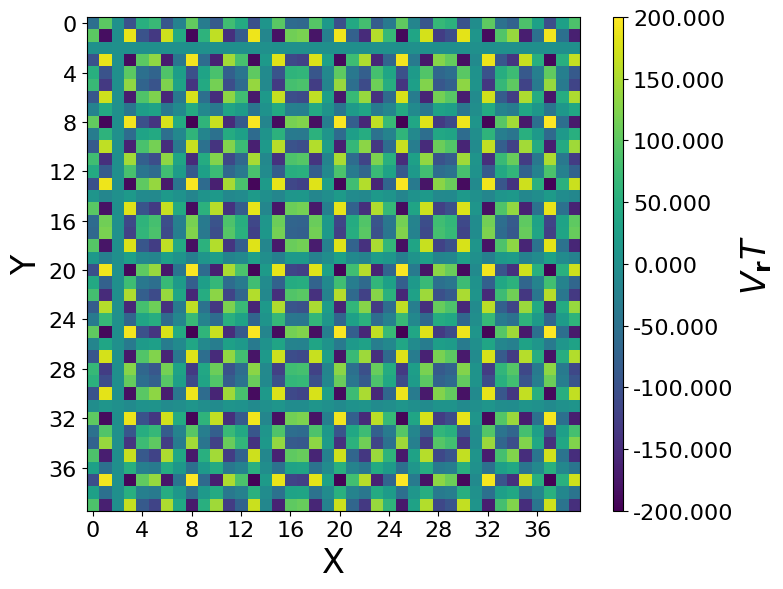

In [ ]:
contour,test221 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=0, phi2_ex=-np.pi*3/2, contourplot=True)

In [ ]:
check_diagonal_symmetry(test221)

(True, False, 0, 1560)

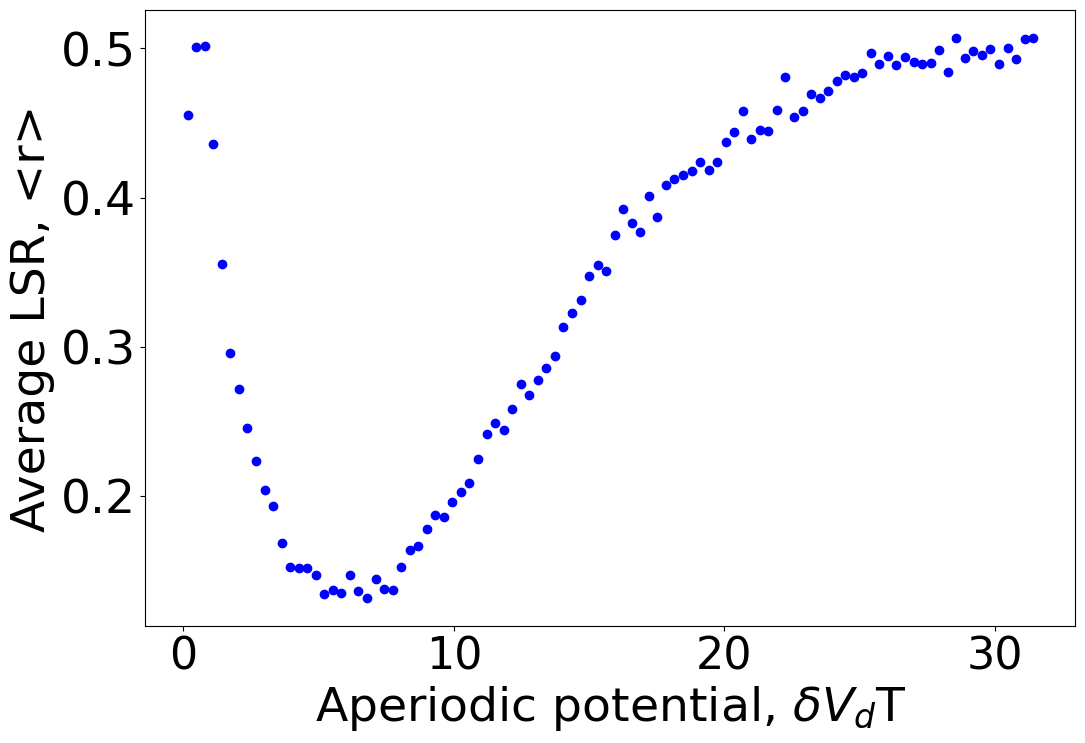

In [ ]:
plot220 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=0, phi2_ex=-np.pi*3/2, fully_disorder=False,plot=True)

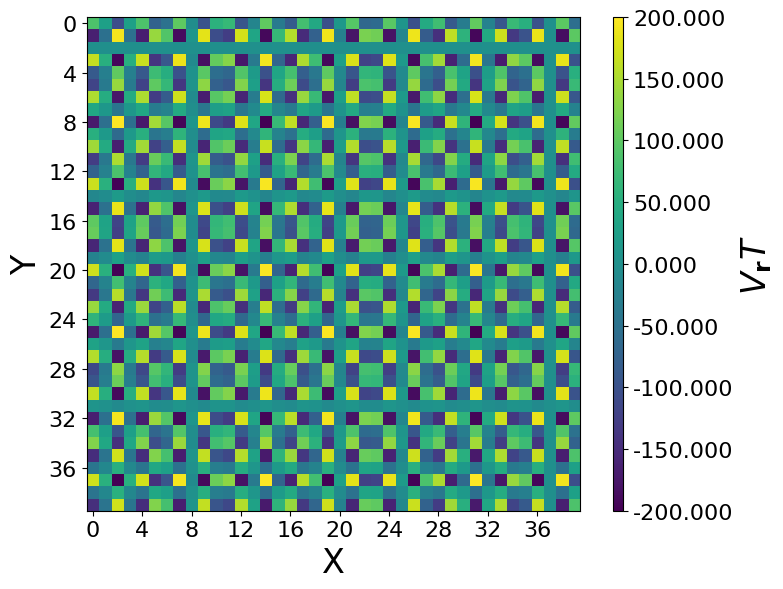

In [ ]:
contour,test3 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=np.pi*3/2, phi2_ex=0, contourplot=True)

In [ ]:
check_diagonal_symmetry(test3)

(False, True, 1560, 0)

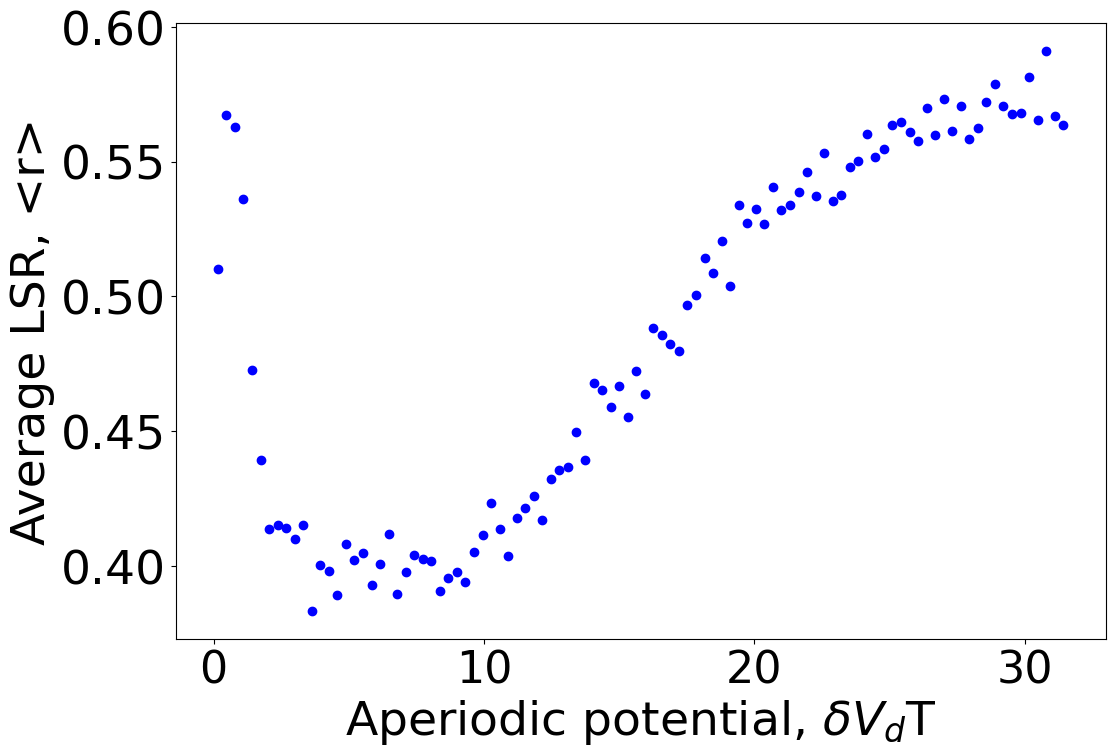

In [ ]:
plot21 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi*3/2, phi2_ex=0, fully_disorder=False,plot=True)

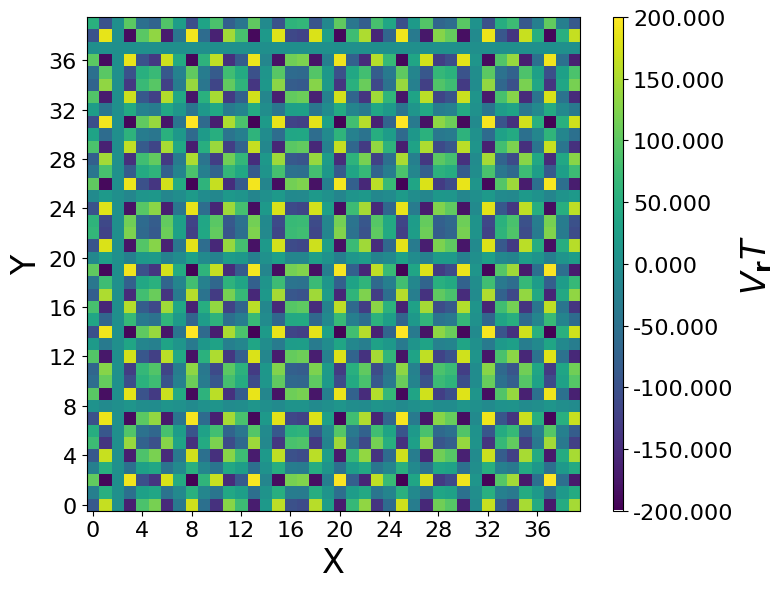

In [ ]:
contour, test4 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=np.pi*3/2, phi2_ex=np.pi,contourplot=True)

In [ ]:
check_diagonal_symmetry(test4)

(False, False, 1560, 244)

In [ ]:
check_horizontal_vertical_symmetry(test4)

(False, False, 800, 800)

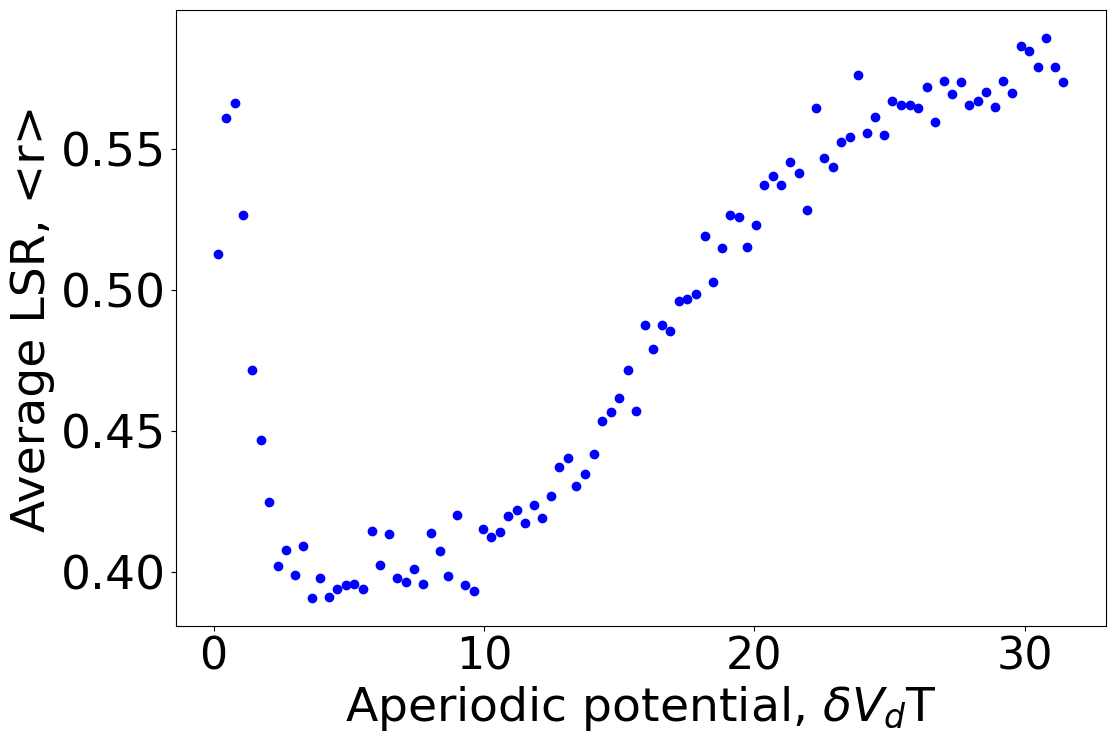

In [ ]:
plot3 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi*3/2, phi2_ex=np.pi, fully_disorder=False,plot=True)

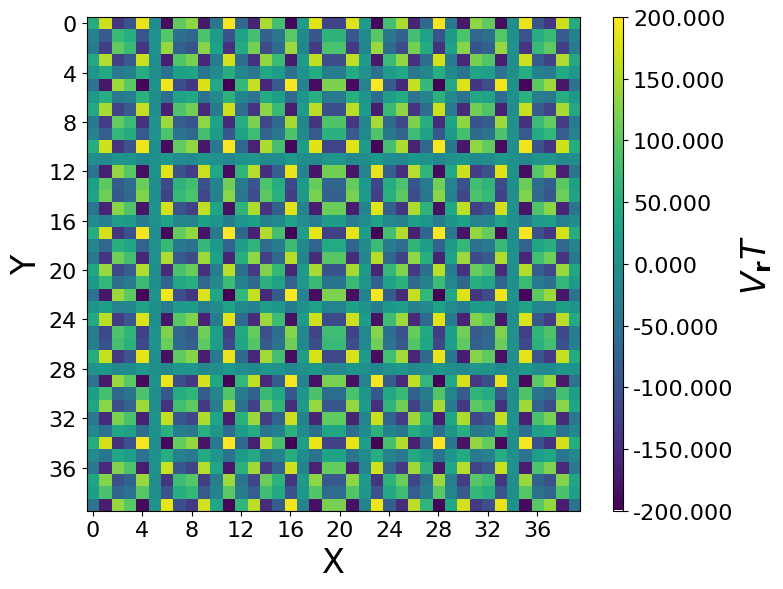

In [ ]:
contour,test5 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=np.pi*3/2, phi2_ex=np.pi/2,contourplot=True)

In [ ]:
check_diagonal_symmetry(test5)

(False, False, 1560, 1560)

In [ ]:
check_horizontal_vertical_symmetry(test5)

(False, False, 800, 179)

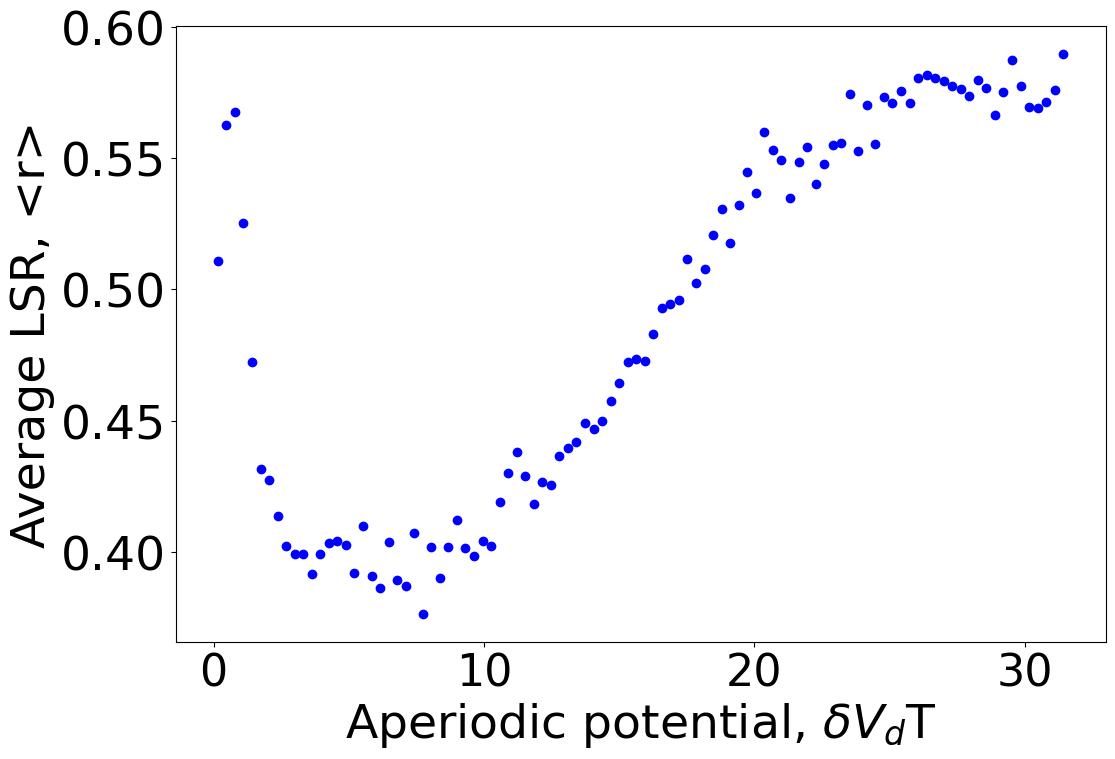

In [ ]:
plot4 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi*3/2, phi2_ex=np.pi/2, fully_disorder=False,plot=True)

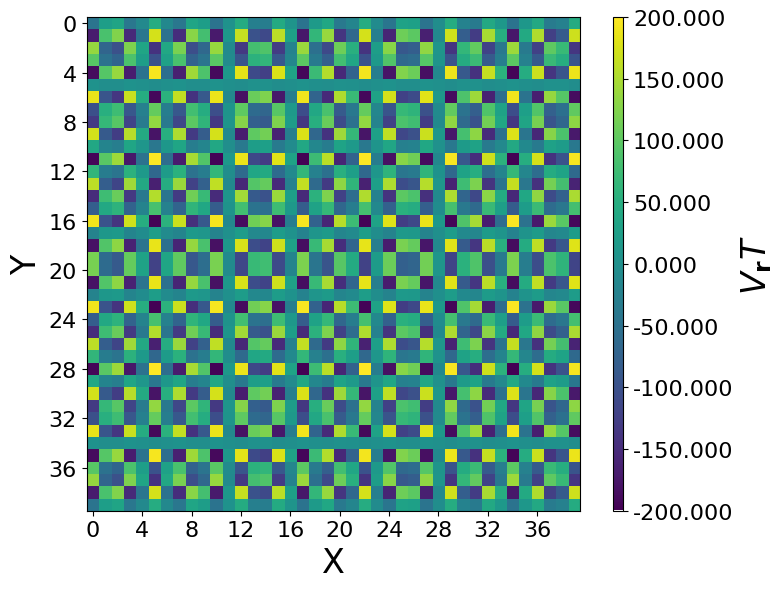

In [ ]:
contour, test6 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=np.pi*3/2, phi2_ex=np.pi*3/2,contourplot=True)

In [ ]:
check_diagonal_symmetry(test6)

(False, False, 1560, 1560)

In [ ]:
check_horizontal_vertical_symmetry(test6)

(True, False, 0, 800)

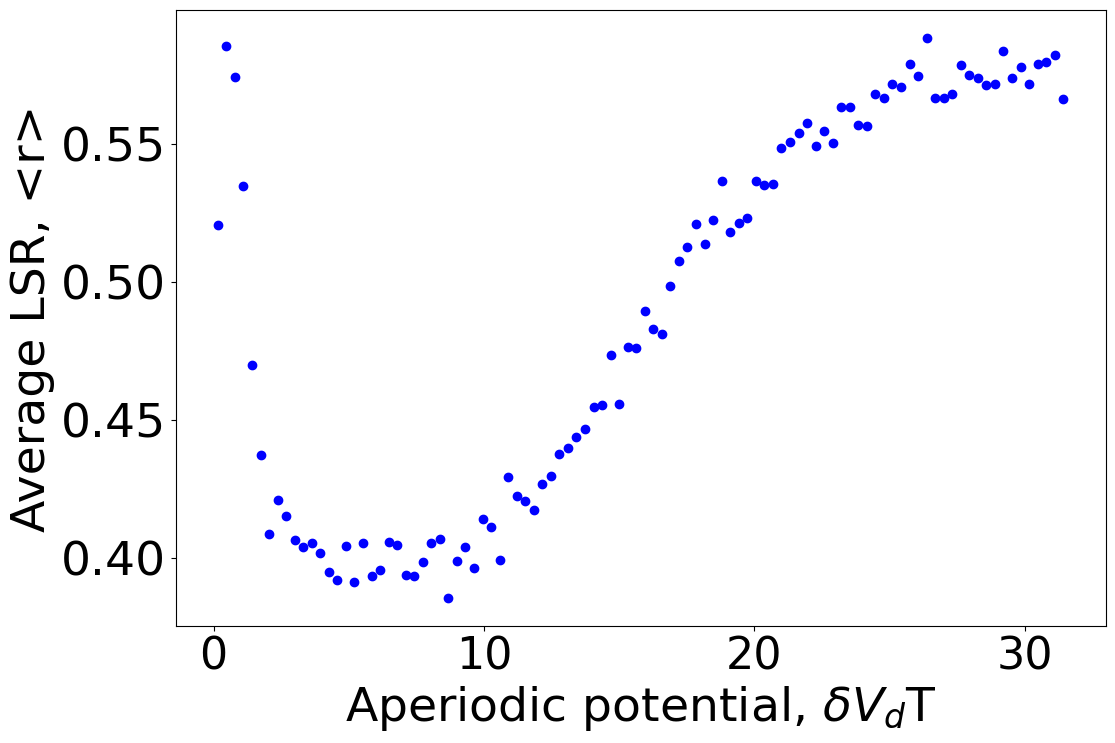

In [ ]:
plot5 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi*3/2, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

In [ ]:
vd_min = 10 * np.pi/(period)
vd_max = 60 * np.pi/(period)

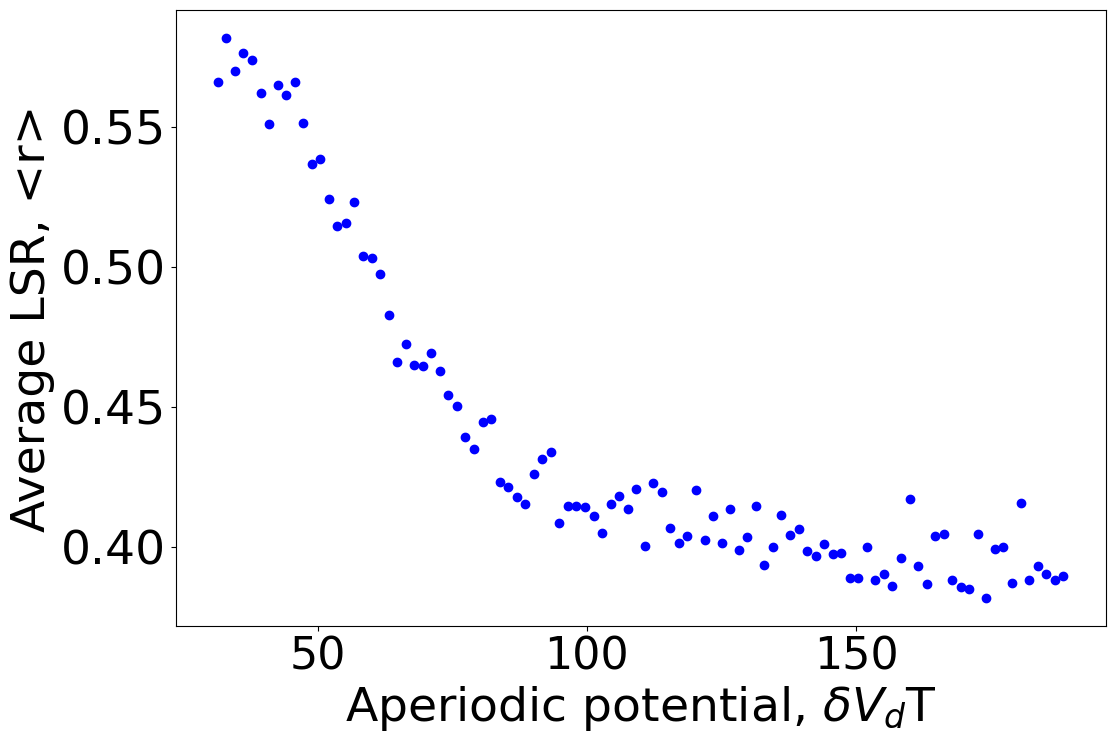

In [ ]:
plot6 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi*3/2, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

In [ ]:
vd_min = 60 * np.pi/(period)
vd_max = 120 * np.pi/(period)

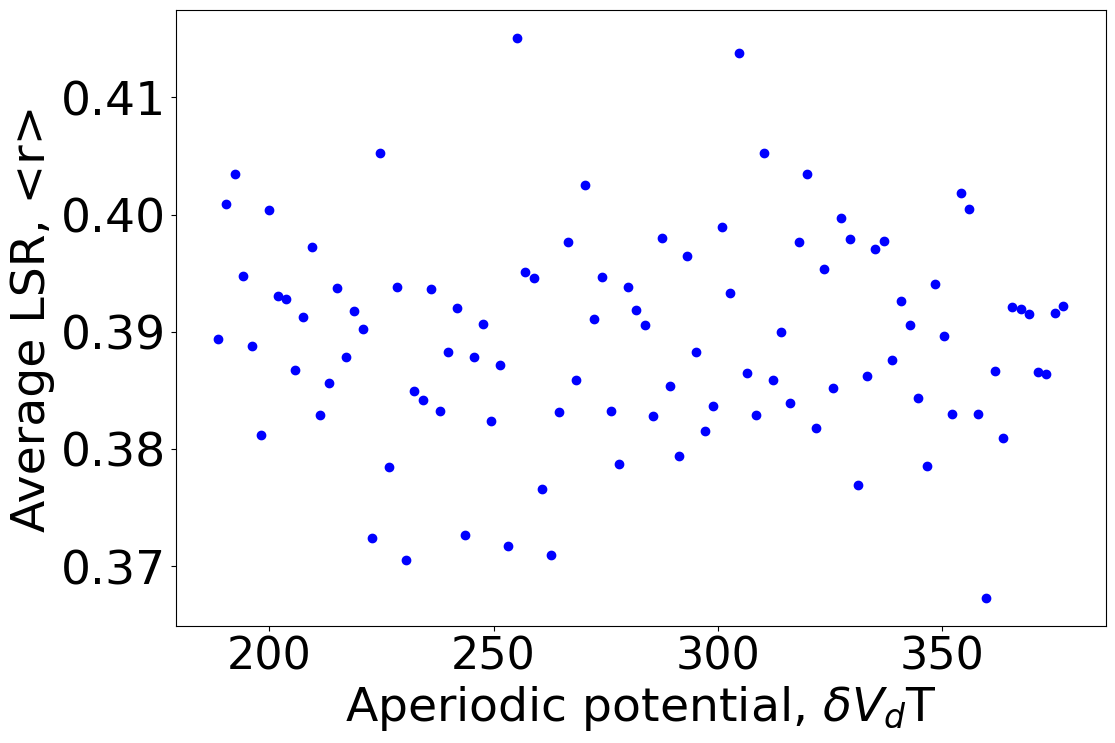

In [ ]:
plot6 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi*3/2, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

Now fix phi2_ex =np.pi*3/2

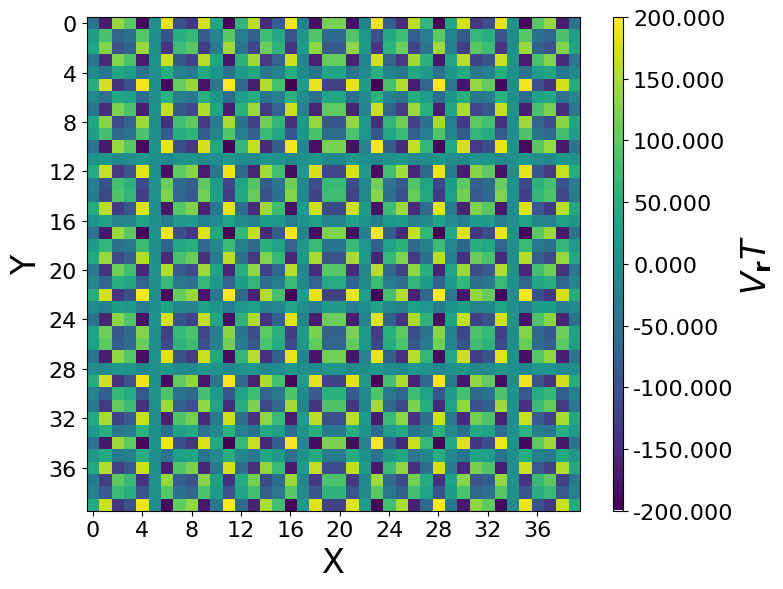

In [ ]:
contour, test7 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=np.pi/2, phi2_ex=np.pi*3/2,contourplot=True)

In [ ]:
check_diagonal_symmetry(test7)

(False, False, 1560, 1560)

In [ ]:
check_horizontal_vertical_symmetry(test7)

(False, False, 800, 179)

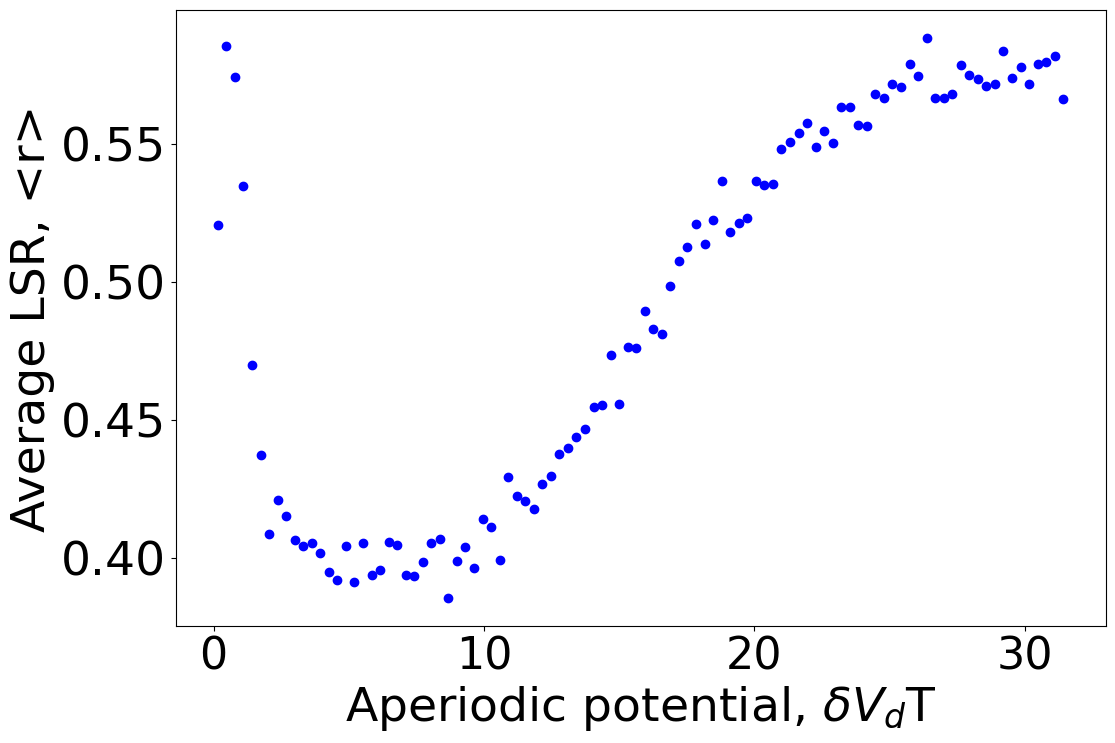

In [ ]:
plot7 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi/2, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

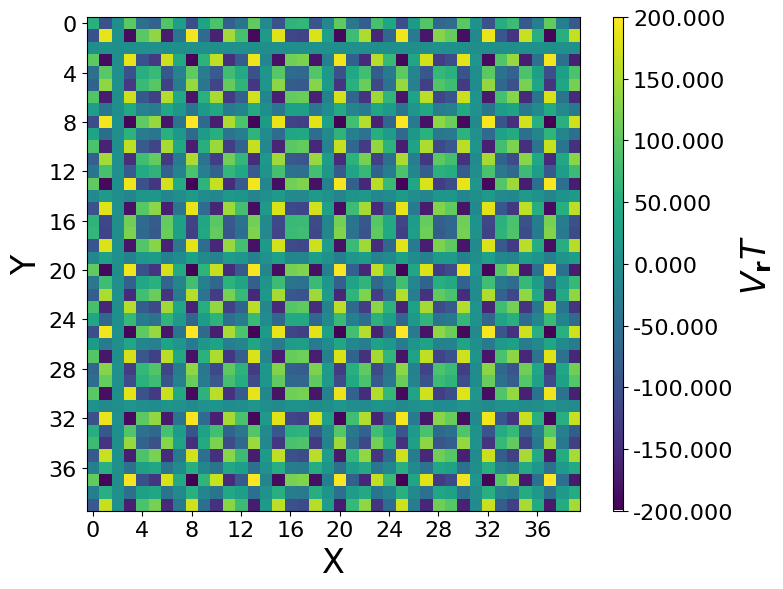

In [ ]:
contour, test8 = model_test_tbcl_cuda.aperiodic_Honsite(vd=2,phi1_ex=np.pi, phi2_ex=np.pi*3/2,contourplot=True)

In [ ]:
check_diagonal_symmetry(test8)

(False, False, 244, 1560)

In [ ]:
check_horizontal_vertical_symmetry(test8)

(False, False, 800, 800)

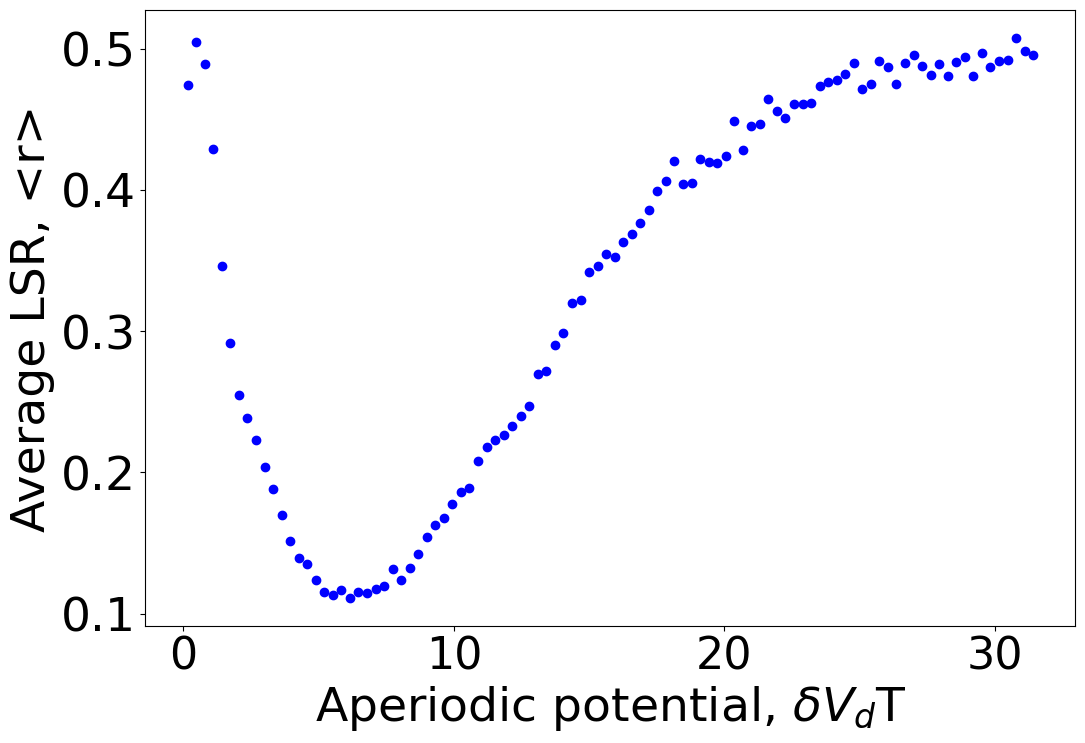

In [ ]:
plot7 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

In [ ]:
vd_min = np.pi/(period)
vd_max = 3 * np.pi/(period)
vd_num = 20 # number of points for different disorder strength

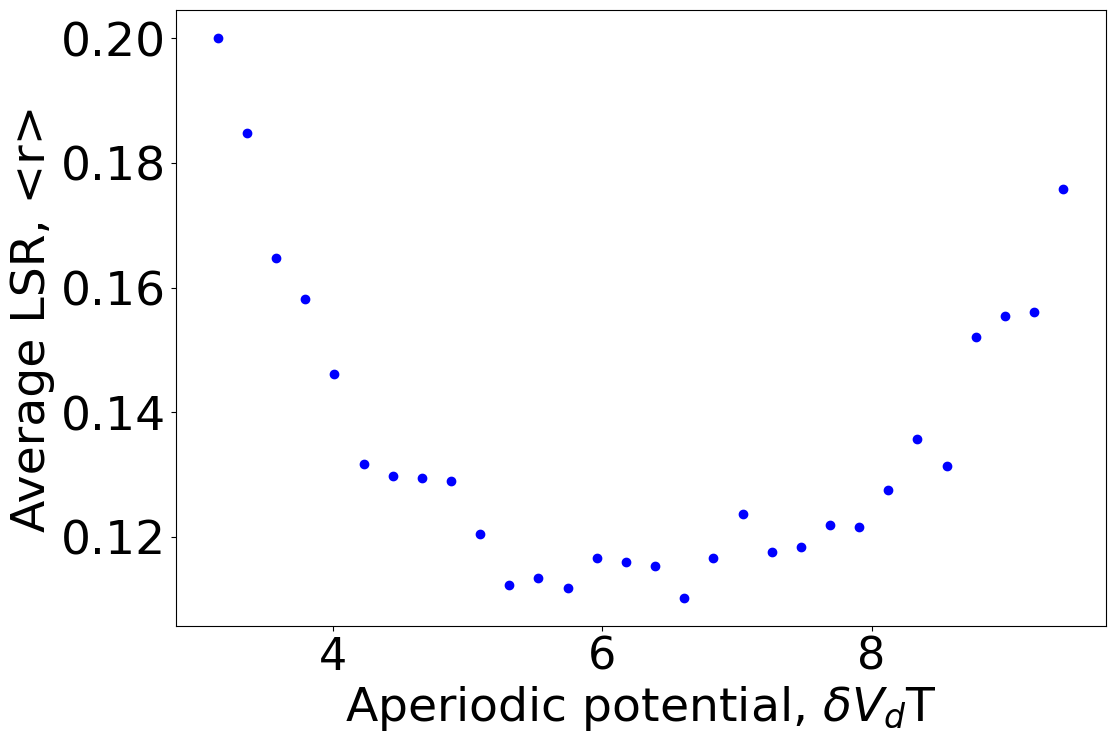

In [ ]:
plot7 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=np.pi, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

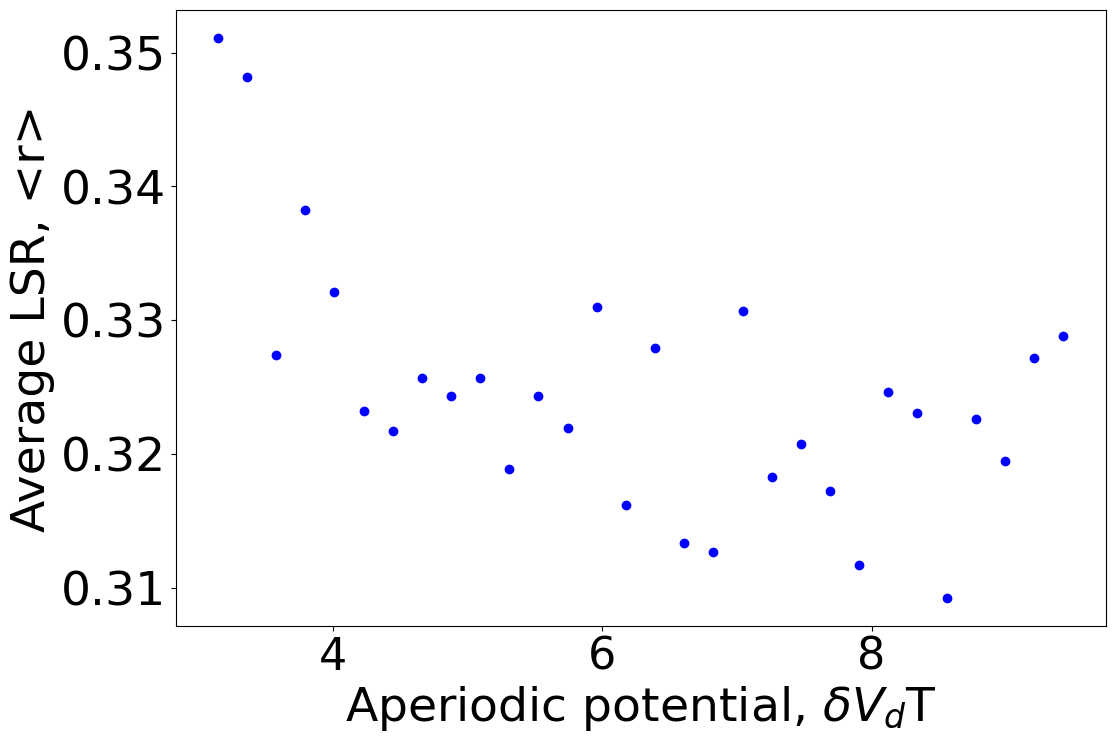

In [ ]:
plot7 = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=3.14, phi2_ex=np.pi*3/2, fully_disorder=False,plot=True)

In [ ]:
phi_array = np.linspace(0, 0.5, 200)
print(phi_array)

[0.         0.00251256 0.00502513 0.00753769 0.01005025 0.01256281
 0.01507538 0.01758794 0.0201005  0.02261307 0.02512563 0.02763819
 0.03015075 0.03266332 0.03517588 0.03768844 0.04020101 0.04271357
 0.04522613 0.04773869 0.05025126 0.05276382 0.05527638 0.05778894
 0.06030151 0.06281407 0.06532663 0.0678392  0.07035176 0.07286432
 0.07537688 0.07788945 0.08040201 0.08291457 0.08542714 0.0879397
 0.09045226 0.09296482 0.09547739 0.09798995 0.10050251 0.10301508
 0.10552764 0.1080402  0.11055276 0.11306533 0.11557789 0.11809045
 0.12060302 0.12311558 0.12562814 0.1281407  0.13065327 0.13316583
 0.13567839 0.13819095 0.14070352 0.14321608 0.14572864 0.14824121
 0.15075377 0.15326633 0.15577889 0.15829146 0.16080402 0.16331658
 0.16582915 0.16834171 0.17085427 0.17336683 0.1758794  0.17839196
 0.18090452 0.18341709 0.18592965 0.18844221 0.19095477 0.19346734
 0.1959799  0.19849246 0.20100503 0.20351759 0.20603015 0.20854271
 0.21105528 0.21356784 0.2160804  0.21859296 0.22110553 0.22361

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


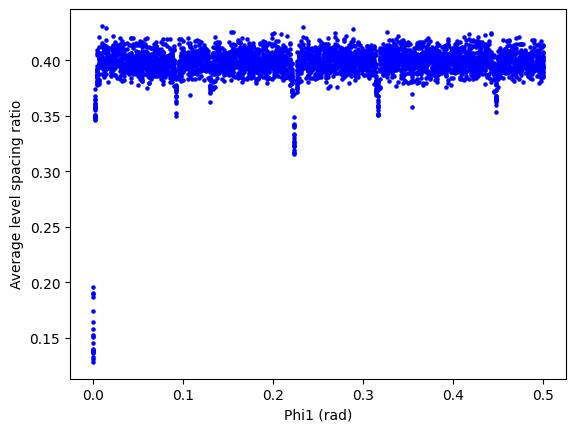

In [ ]:
for i in range(0, len(phi_array)):
    phi1 = phi_array[i]
    phi2 = np.pi * 3 / 2  # Fixed value for all iterations
    plots = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=phi1, phi2_ex=phi2, fully_disorder=False, plot=False)
    print(i)
    # Assuming 'plots' is an array of values to be plotted
    for plot_value in plots:
        plt.scatter(phi1, plot_value, s=5, color='blue')

# Setting labels for the axes
plt.xlabel('Phi1 (rad)')
plt.ylabel('Average level spacing ratio')
plt.show()

In [36]:
phi_array = np.linspace(0.21, 0.24, 50)
print(phi_array)

[0.21       0.21061224 0.21122449 0.21183673 0.21244898 0.21306122 0.21367347 0.21428571 0.21489796 0.2155102  0.21612245 0.21673469 0.21734694 0.21795918 0.21857143 0.21918367 0.21979592 0.22040816 0.22102041 0.22163265 0.2222449  0.22285714 0.22346939 0.22408163 0.22469388 0.22530612 0.22591837
 0.22653061 0.22714286 0.2277551  0.22836735 0.22897959 0.22959184 0.23020408 0.23081633 0.23142857 0.23204082 0.23265306 0.23326531 0.23387755 0.2344898  0.23510204 0.23571429 0.23632653 0.23693878 0.23755102 0.23816327 0.23877551 0.23938776 0.24      ]


In [37]:
phi_array[1] - phi_array[0]

0.000612244897959191

0
1
2


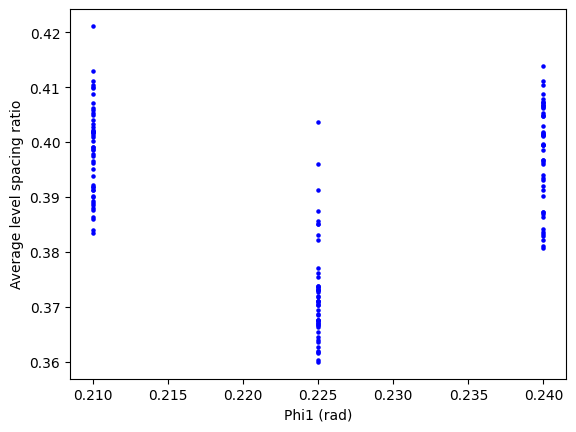

In [ ]:
vd_min, vd_max, vd_num = np.pi/(period), 3*np.pi/(period), 50
for i in range(0, len(phi_array)):
    phi1 = phi_array[i]
    phi2 = np.pi * 3 / 2  # Fixed value for all iterations
    plots = model_test_tbcl_cuda.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=phi1, phi2_ex=phi2, fully_disorder=False, plot=False)
    print(i)
    # Assuming 'plots' is an array of values to be plotted
    for plot_value in plots:
        plt.scatter(phi1, plot_value, s=5, color='blue')

# Setting labels for the axes
plt.xlabel('Phi1 (rad)')
plt.ylabel('Average level spacing ratio')
plt.show()

Processing phi1=0.21000
Processing phi1=0.21061
Processing phi1=0.21122
Processing phi1=0.21184
Processing phi1=0.21245
Processing phi1=0.21306
Processing phi1=0.21367
Processing phi1=0.21429
Processing phi1=0.21490
Processing phi1=0.21551
Processing phi1=0.21612Completed phi1=0.21

Processing phi1=0.21673Completed phi1=0.21

Processing phi1=0.21735Completed phi1=0.21

Processing phi1=0.21796Completed phi1=0.21

Processing phi1=0.21857Completed phi1=0.21

Processing phi1=0.21918
Completed phi1=0.21
Processing phi1=0.21980Completed phi1=0.22

Processing phi1=0.22041Completed phi1=0.21

Processing phi1=0.22102Completed phi1=0.21

Processing phi1=0.22163Completed phi1=0.21

Processing phi1=0.22224Completed phi1=0.22

Processing phi1=0.22286Completed phi1=0.22

Processing phi1=0.22347Completed phi1=0.22

Processing phi1=0.22408Completed phi1=0.22

Processing phi1=0.22469Completed phi1=0.22

Processing phi1=0.22531Completed phi1=0.22

Processing phi1=0.22592Completed phi1=0.22

Processing p

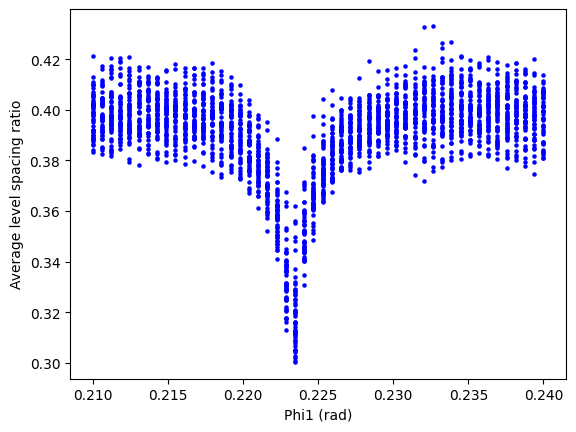

In [ ]:
def process_phi1(phi1, phi2, vd_min, vd_max, vd_num, model):
    print(f"Processing phi1={phi1:.5f}")
    plots = model.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=phi1, phi2_ex=phi2, fully_disorder=False, plot=False)
    return phi1, plots

def main():
    phi2 = np.pi * 3 / 2
    vd_min, vd_max, vd_num = np.pi/(period), 3*np.pi/(period), 50
    model = model_test_tbcl_cuda

    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = {executor.submit(process_phi1, phi1, phi2, vd_min, vd_max, vd_num, model): phi1 for phi1 in phi_array}
        results = []
        for future in as_completed(futures):
            phi1 = futures[future]
            try:
                result = future.result()
                results.append(result)
                print(f"Completed phi1={phi1:.2f}")
            except Exception as exc:
                print(f"phi1={phi1:.2f} generated an exception: {exc}")

    for phi1, plots in results:
        for plot_value in plots:
            plt.scatter(phi1, plot_value, s=5, color='blue')

    plt.xlabel('Phi1 (rad)')
    plt.ylabel('Average level spacing ratio')
    plt.show()

if __name__ == "__main__":
    main()

In [38]:
phi_array = np.linspace(0.2228, 0.224, 50)
print(phi_array)

[0.2228     0.22282449 0.22284898 0.22287347 0.22289796 0.22292245 0.22294694 0.22297143 0.22299592 0.22302041 0.2230449  0.22306939 0.22309388 0.22311837 0.22314286 0.22316735 0.22319184 0.22321633 0.22324082 0.22326531 0.2232898  0.22331429 0.22333878 0.22336327 0.22338776 0.22341224 0.22343673
 0.22346122 0.22348571 0.2235102  0.22353469 0.22355918 0.22358367 0.22360816 0.22363265 0.22365714 0.22368163 0.22370612 0.22373061 0.2237551  0.22377959 0.22380408 0.22382857 0.22385306 0.22387755 0.22390204 0.22392653 0.22395102 0.22397551 0.224     ]


In [53]:
np.pi *2 / 0.000612244897959191

10262.536001726534

In [59]:
10250 * 6 / 60 /24

42.708333333333336

Processing phi1=0.22280
Processing phi1=0.22282
Processing phi1=0.22285
Processing phi1=0.22287
Processing phi1=0.22290
Processing phi1=0.22292
Processing phi1=0.22295
Processing phi1=0.22297
Processing phi1=0.22300
Processing phi1=0.22302
Processing phi1=0.22304Completed phi1=0.22

Processing phi1=0.22307
Completed phi1=0.22
Processing phi1=0.22309Completed phi1=0.22

Processing phi1=0.22312Completed phi1=0.22

Processing phi1=0.22314Completed phi1=0.22

Processing phi1=0.22317Completed phi1=0.22

Processing phi1=0.22319Completed phi1=0.22

Processing phi1=0.22322Completed phi1=0.22

Processing phi1=0.22324Completed phi1=0.22

Processing phi1=0.22327Completed phi1=0.22

Processing phi1=0.22329Completed phi1=0.22

Processing phi1=0.22331Completed phi1=0.22

Processing phi1=0.22334Completed phi1=0.22

Processing phi1=0.22336Completed phi1=0.22

Processing phi1=0.22339Completed phi1=0.22

Processing phi1=0.22341Completed phi1=0.22

Processing phi1=0.22344Completed phi1=0.22

Processing p

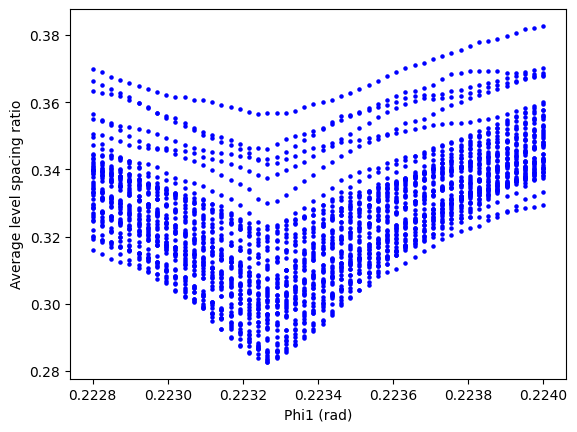

In [7]:
def process_phi1(phi1, phi2, vd_min, vd_max, vd_num, model):
    print(f"Processing phi1={phi1:.5f}")
    plots = model.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=phi1, phi2_ex=phi2, fully_disorder=False, plot=False)
    return phi1, plots

def main():
    phi2 = np.pi * 3 / 2
    vd_min, vd_max, vd_num = np.pi/(period), 3*np.pi/(period), 50
    model = model_test_tbcl_cuda

    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = {executor.submit(process_phi1, phi1, phi2, vd_min, vd_max, vd_num, model): phi1 for phi1 in phi_array}
        results = []
        for future in as_completed(futures):
            phi1 = futures[future]
            try:
                result = future.result()
                results.append(result)
                print(f"Completed phi1={phi1:.2f}")
            except Exception as exc:
                print(f"phi1={phi1:.2f} generated an exception: {exc}")

    for phi1, plots in results:
        for plot_value in plots:
            plt.scatter(phi1, plot_value, s=5, color='blue')

    plt.xlabel('Phi1 (rad)')
    plt.ylabel('Average level spacing ratio')
    plt.show()

if __name__ == "__main__":
    main()

In [5]:
phi_array = np.linspace(0, 2*np.pi, 10300)
first_300_points = phi_array[0:300]

In [10]:
print(first_300_points)

[0.         0.00061008 0.00122015 0.00183023 0.00244031 0.00305039
 0.00366046 0.00427054 0.00488062 0.00549069 0.00610077 0.00671085
 0.00732093 0.007931   0.00854108 0.00915116 0.00976124 0.01037131
 0.01098139 0.01159147 0.01220154 0.01281162 0.0134217  0.01403178
 0.01464185 0.01525193 0.01586201 0.01647208 0.01708216 0.01769224
 0.01830232 0.01891239 0.01952247 0.02013255 0.02074263 0.0213527
 0.02196278 0.02257286 0.02318293 0.02379301 0.02440309 0.02501317
 0.02562324 0.02623332 0.0268434  0.02745347 0.02806355 0.02867363
 0.02928371 0.02989378 0.03050386 0.03111394 0.03172402 0.03233409
 0.03294417 0.03355425 0.03416432 0.0347744  0.03538448 0.03599456
 0.03660463 0.03721471 0.03782479 0.03843486 0.03904494 0.03965502
 0.0402651  0.04087517 0.04148525 0.04209533 0.04270541 0.04331548
 0.04392556 0.04453564 0.04514571 0.04575579 0.04636587 0.04697595
 0.04758602 0.0481961  0.04880618 0.04941625 0.05002633 0.05063641
 0.05124649 0.05185656 0.05246664 0.05307672 0.0536868  0.05429

Processing phi1=0.00000
Processing phi1=0.00061
Processing phi1=0.00122
Processing phi1=0.00183
Processing phi1=0.00244
Processing phi1=0.00305
Processing phi1=0.00366
Processing phi1=0.00427
Processing phi1=0.00488
Processing phi1=0.00549
Processing phi1=0.00610
Processing phi1=0.00671
Processing phi1=0.00732
Processing phi1=0.00793
Processing phi1=0.00854
Processing phi1=0.00915
Processing phi1=0.00976
Processing phi1=0.01037
Processing phi1=0.01098
Processing phi1=0.01159
Processing phi1=0.01220Completed phi1=0.00

Processing phi1=0.01281Completed phi1=0.00

Processing phi1=0.01342Completed phi1=0.00

Processing phi1=0.01403Completed phi1=0.00

Processing phi1=0.01464Completed phi1=0.00

Processing phi1=0.01525Completed phi1=0.00

Processing phi1=0.01586Completed phi1=0.01

Processing phi1=0.01647Completed phi1=0.00

Processing phi1=0.01708Completed phi1=0.00

Processing phi1=0.01769Completed phi1=0.00

Processing phi1=0.01830Completed phi1=0.01

Processing phi1=0.01891Completed phi

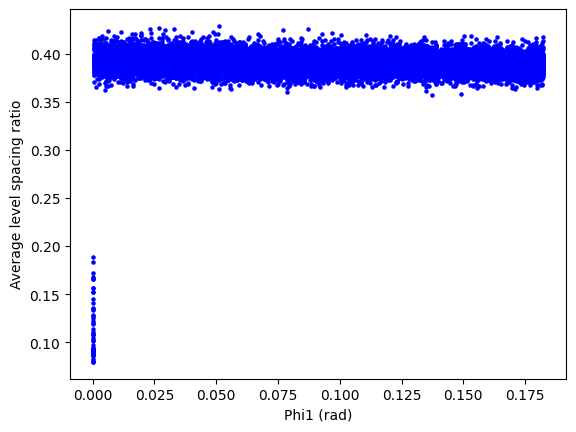

In [9]:
def process_phi1(phi1, phi2, vd_min, vd_max, vd_num, model):
    print(f"Processing phi1={phi1:.5f}")
    plots = model.avg_level_spacing_bulk_vd(vd_min, vd_max, vd_num, phi1_ex=phi1, phi2_ex=phi2, fully_disorder=False, plot=False)
    return phi1, plots

def main():
    phi2 = np.pi * 3 / 2
    vd_min, vd_max, vd_num = np.pi/(2), 3*np.pi/(2), 50  # Assuming period is defined somewhere
    model = model_test_tbcl_cuda  # if model_test_tbcl_cuda is already an instance

    # Open a text file to store the results
    with open('results300.txt', 'w') as file:
        with ThreadPoolExecutor(max_workers=20) as executor:
            futures = {executor.submit(process_phi1, phi, phi2, vd_min, vd_max, vd_num, model): phi for phi in first_300_points}
            results = []
            for future in as_completed(futures):
                phi1 = futures[future]
                try:
                    result = future.result()
                    results.append(result)
                    print(f"Completed phi1={phi1:.2f}")
                    # Write successful result to file
                    file.write(f"Phi1={result[0]:.5f}, Plots={result[1]}\n")
                except Exception as exc:
                    print(f"Phi1={phi1:.2f} generated an exception: {exc}")
                    # Write exception to file
                    file.write(f"Phi1={phi1:.5f} generated an exception: {exc}\n")

        for phi1, plots in results:
            for plot_value in plots:
                plt.scatter(phi1, plot_value, s=5, color='blue')

        plt.xlabel('Phi1 (rad)')
        plt.ylabel('Average level spacing ratio')
        plt.show()

if __name__ == "__main__":
    main()

In [8]:
torch.cuda.empty_cache()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


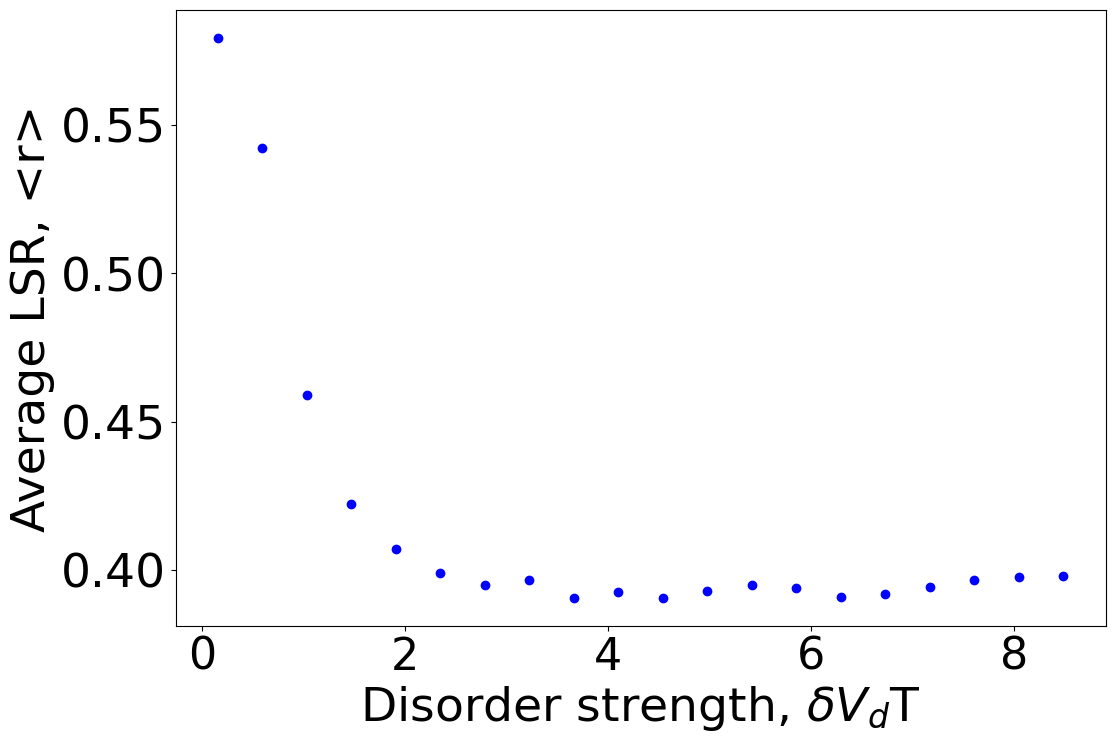

In [24]:
plot = model_test_tbcl_cuda.avg_LSR__disorder_realisation(vd_max, vd_num, N_dis, fully_disorder=True)

In [11]:
torch.cuda.empty_cache()

In [12]:
N_phi = 300

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

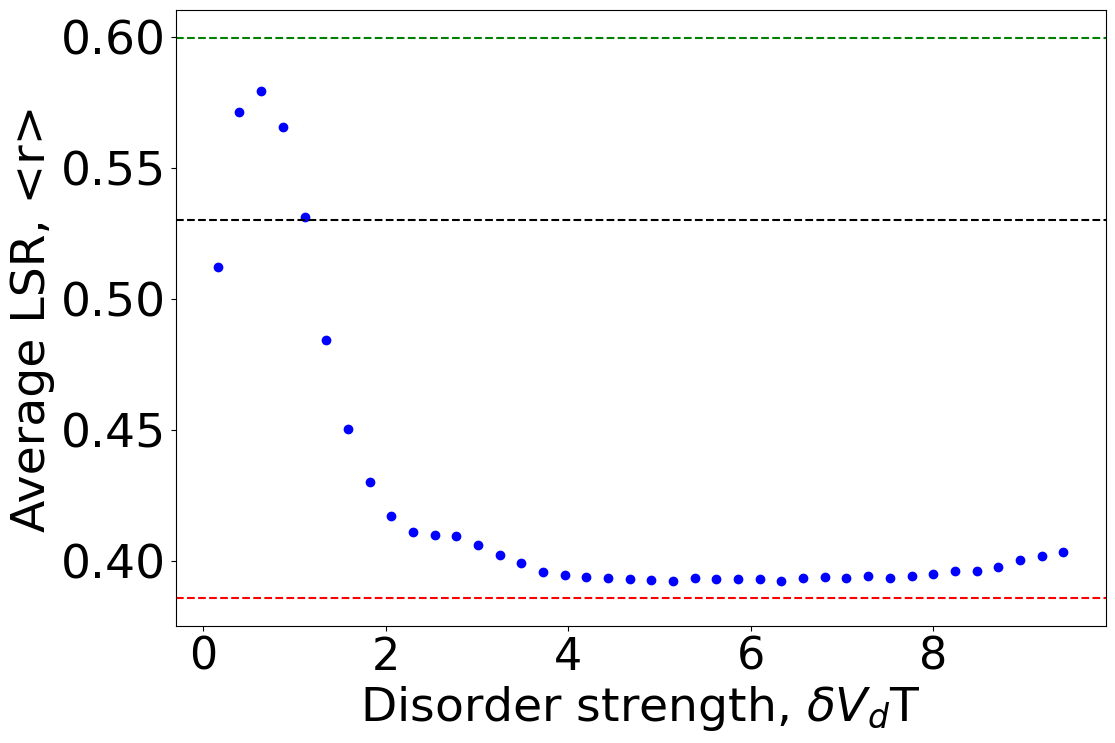

In [13]:
plot = model_test_tbcl_cuda.avg_LSR_phase_realisation(vd_min, vd_max, vd_num, N_phi)